# FINAL EXAM

## Name: Sunil Kamkar Sheshagiri | EID: SK56743 | Date: 07/31/2022 | ISLR V2


#### INSTALL BELOW LIBRARIES BEFORE IMPORTING
- !pip install xgboost
- !pip install graphviz
- pip install git+https://github.com/pymc-devs/pymc-experimental.git
- pip install pandas
- conda install -c conda-forge statsmodels
- brew install graphviz
- brew/pip install tensorflow
- pip install mlxtend

#### Import all the required variables

In [378]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import plot
from IPython.display import Markdown
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.cm as cm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso,LassoCV,RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold as KF
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBRegressor,XGBClassifier
from io import StringIO
from tqdm import tqdm
from pathlib import Path
import arviz as az
import pymc as pm
import pymc_experimental as pmx
import graphviz
from IPython.display import HTML
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
#from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.neighbors import KNeighborsClassifier
import pydotplus
from IPython.display import Image
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.layers import Input, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint 

## CHAPTER 2

In [121]:
# Load the dataset
boston = pd.DataFrame(load_boston().data,columns = load_boston().feature_names )
boston['target'] = load_boston().target
boston.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## QUESTION 10

### a) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [122]:
print("The number of records in the boston data is ", boston.shape[0])
print("The number of attributes in the boston data is ", boston.shape[1])
print(load_boston()['DESCR'])

The number of records in the boston data is  506
The number of attributes in the boston data is  14
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility 

### b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

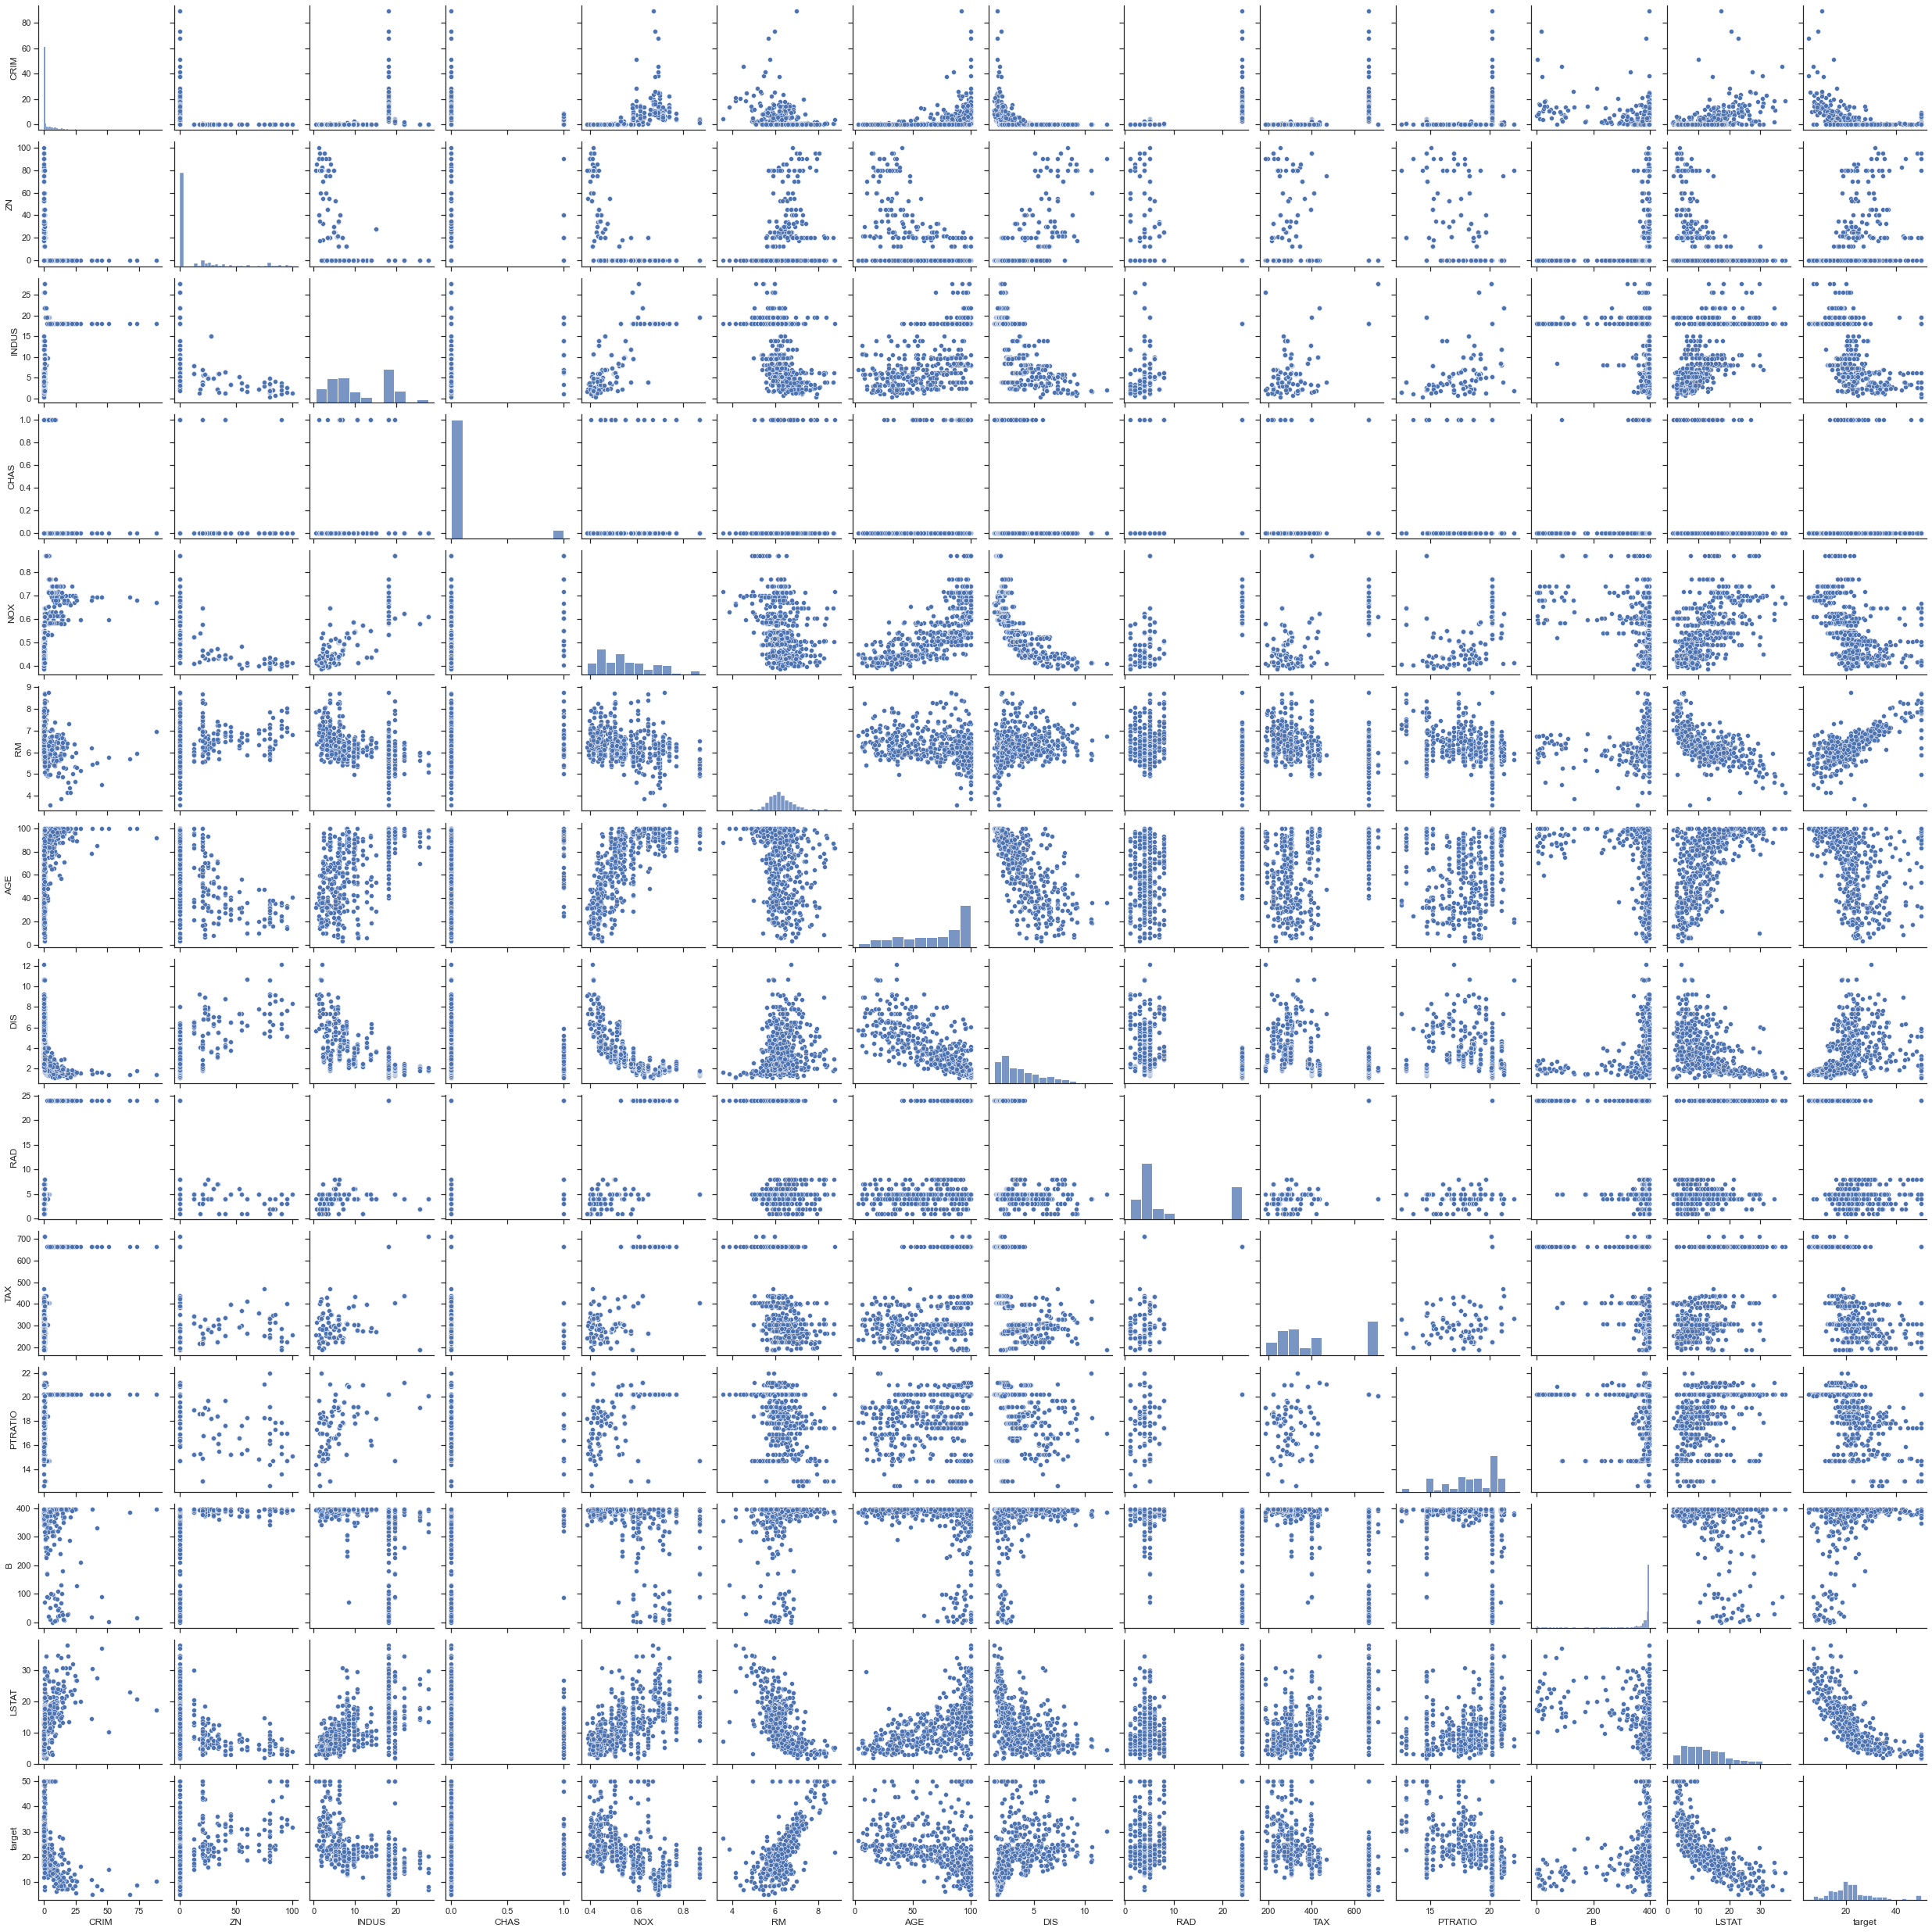

In [5]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(boston)

## CRIM

### CRIM vs ZN, INDUS, CHAS, NOX, RM

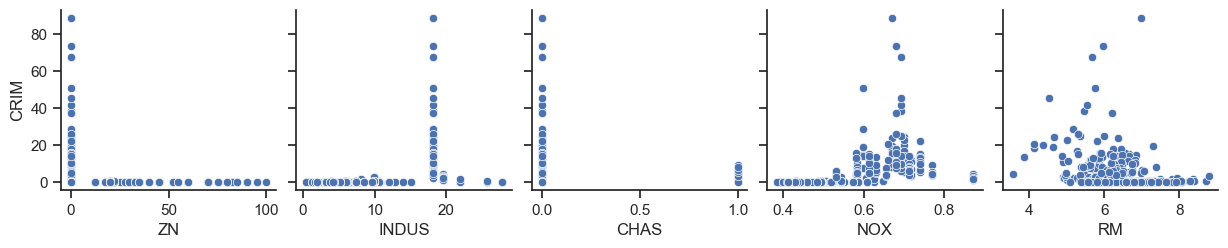

### CRIM vs AGE, DIS, RAD, TAX, PTRATIO

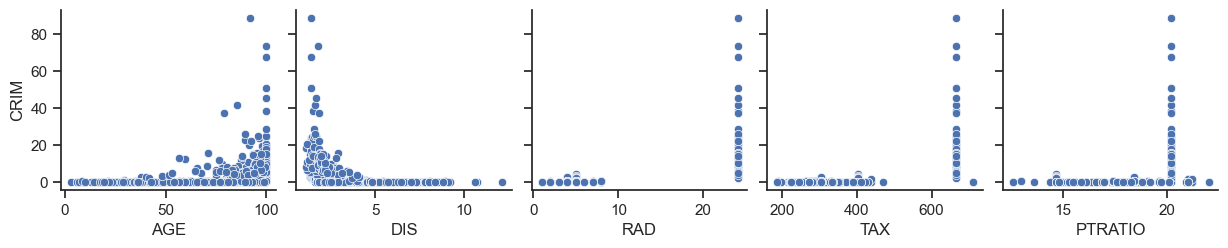

### CRIM vs B, LSTAT, target

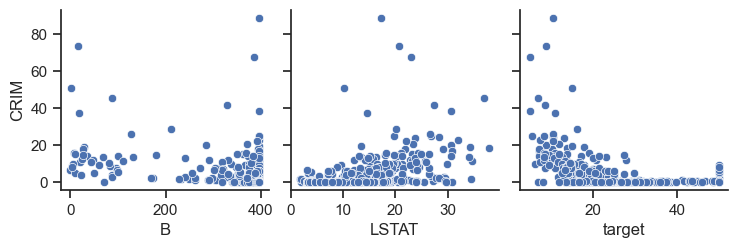

## ZN

### ZN vs CRIM, INDUS, CHAS, NOX, RM

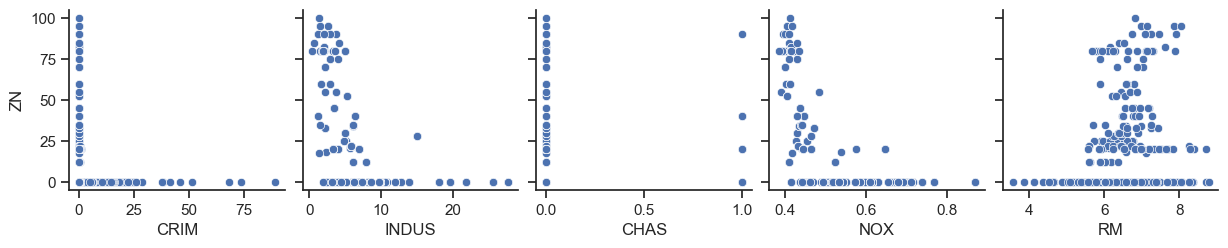

### ZN vs AGE, DIS, RAD, TAX, PTRATIO

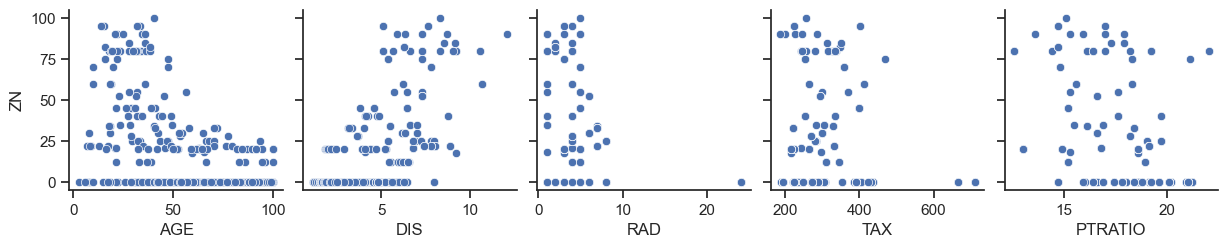

### ZN vs B, LSTAT, target

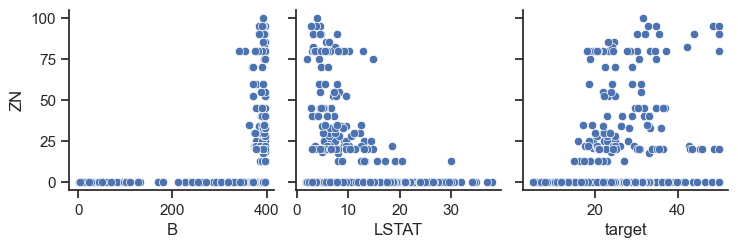

## INDUS

### INDUS vs CRIM, ZN, CHAS, NOX, RM

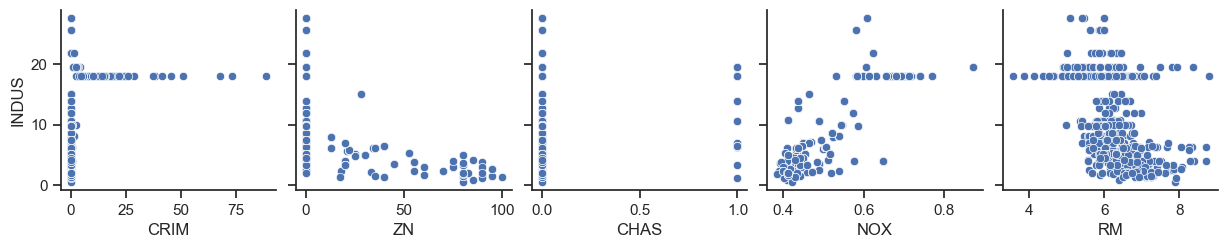

### INDUS vs AGE, DIS, RAD, TAX, PTRATIO

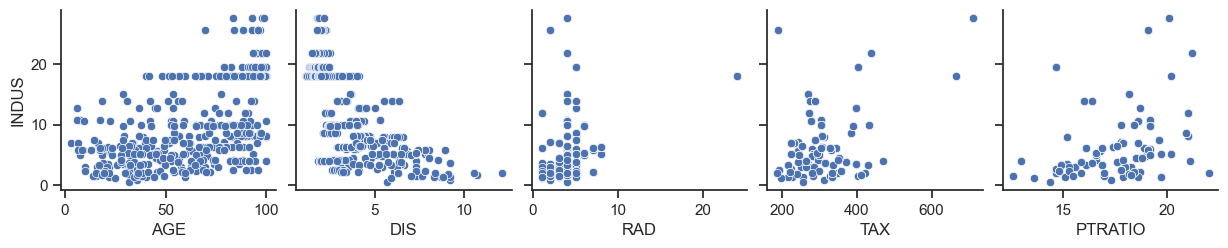

### INDUS vs B, LSTAT, target

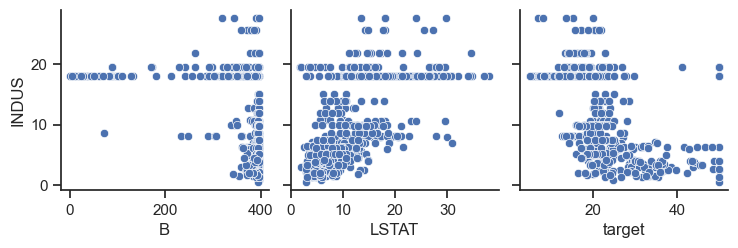

## CHAS

### CHAS vs CRIM, ZN, INDUS, NOX, RM

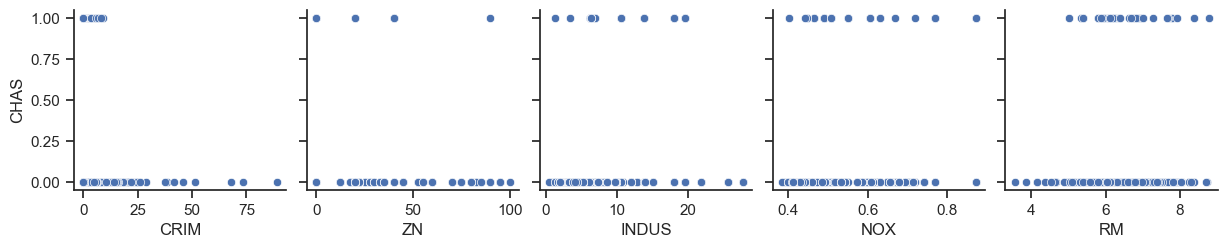

### CHAS vs AGE, DIS, RAD, TAX, PTRATIO

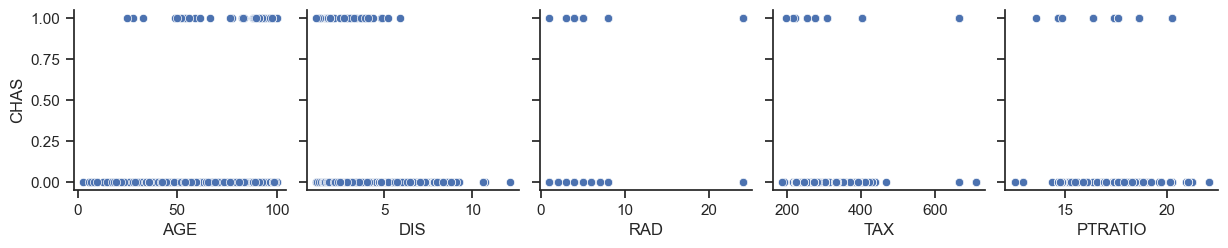

### CHAS vs B, LSTAT, target

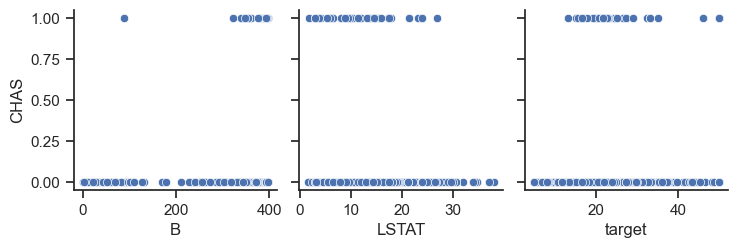

## NOX

### NOX vs CRIM, ZN, INDUS, CHAS, RM

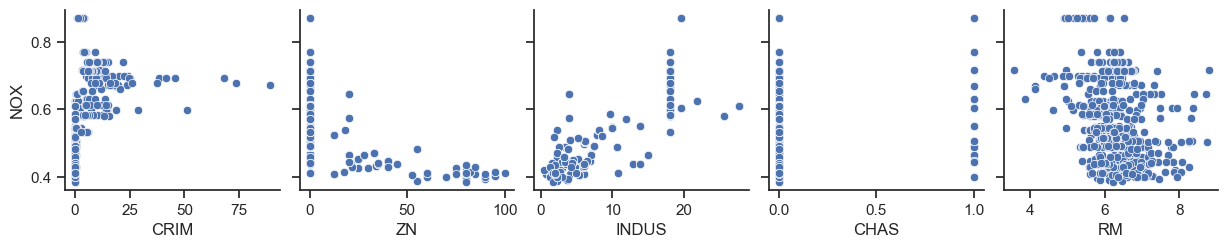

### NOX vs AGE, DIS, RAD, TAX, PTRATIO

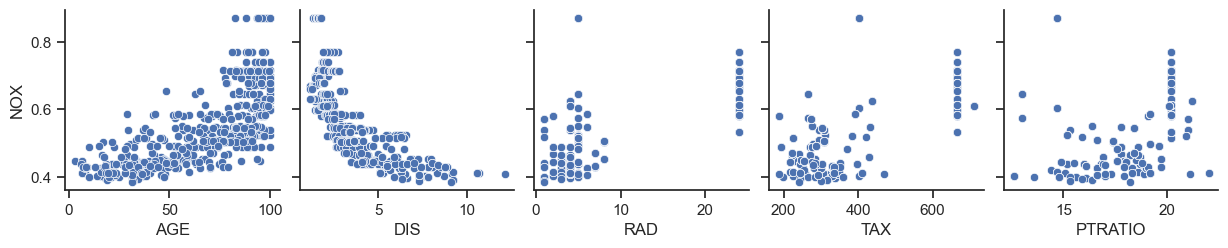

### NOX vs B, LSTAT, target

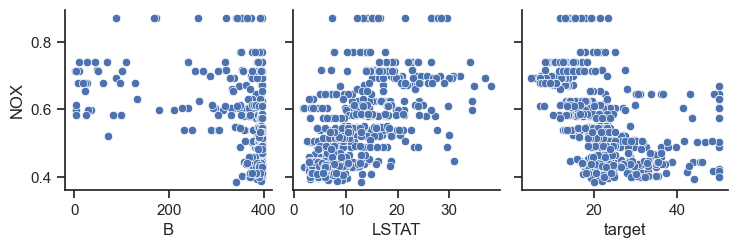

## RM

### RM vs CRIM, ZN, INDUS, CHAS, NOX

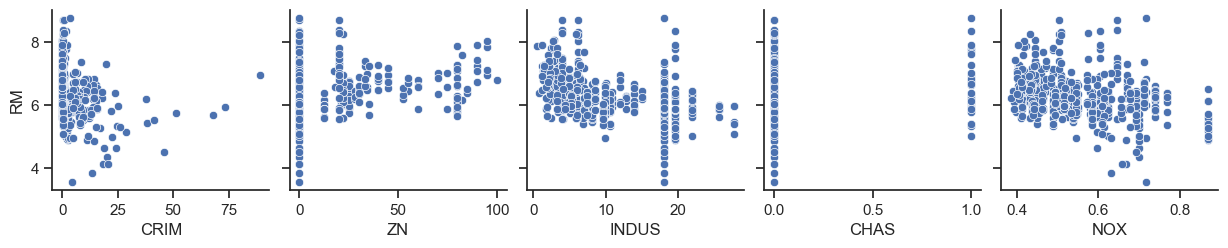

### RM vs AGE, DIS, RAD, TAX, PTRATIO

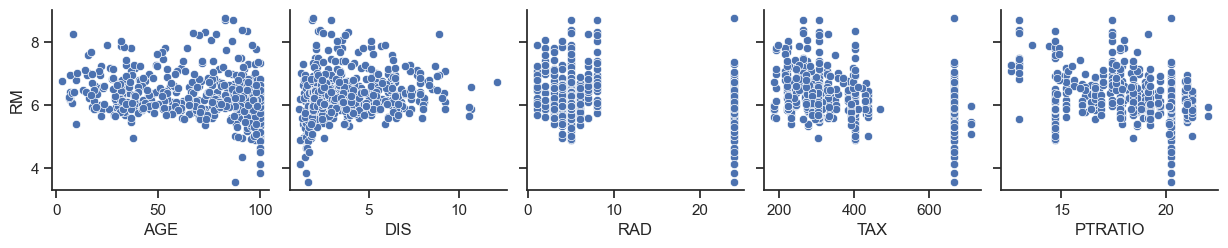

### RM vs B, LSTAT, target

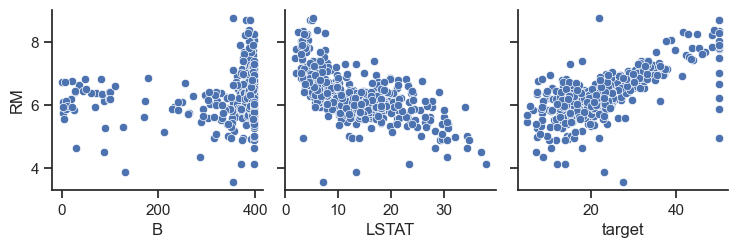

## AGE

### AGE vs CRIM, ZN, INDUS, CHAS, NOX

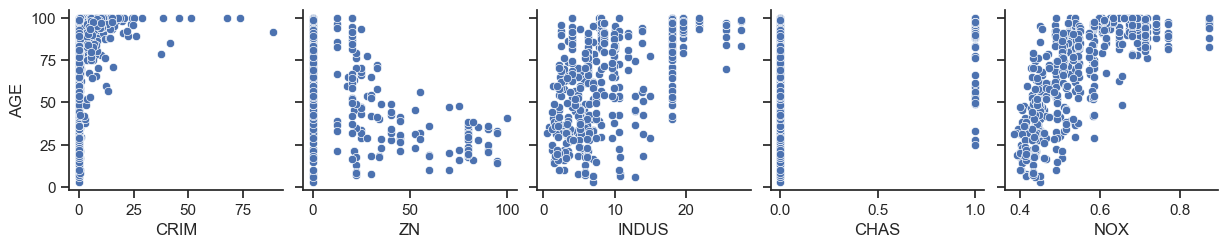

### AGE vs RM, DIS, RAD, TAX, PTRATIO

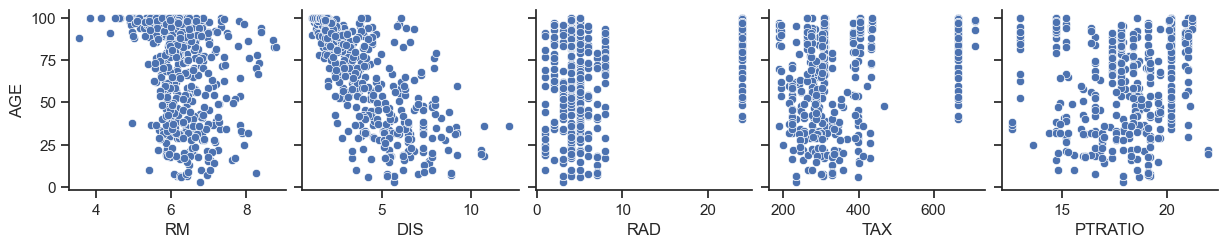

### AGE vs B, LSTAT, target

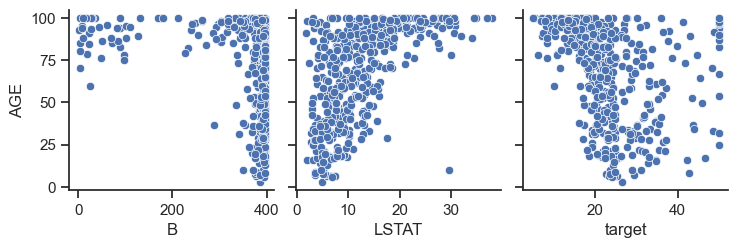

## DIS

### DIS vs CRIM, ZN, INDUS, CHAS, NOX

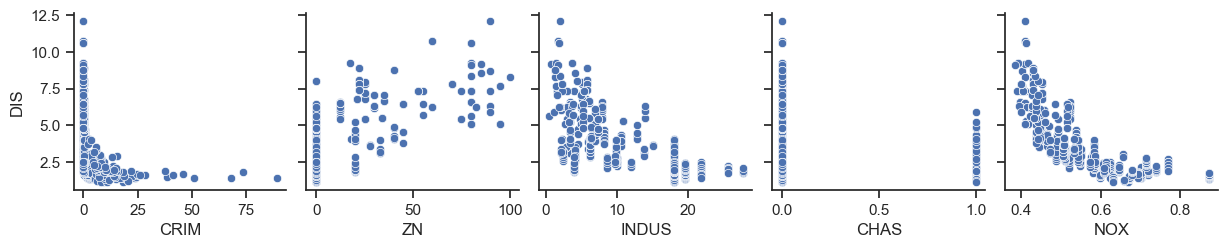

### DIS vs RM, AGE, RAD, TAX, PTRATIO

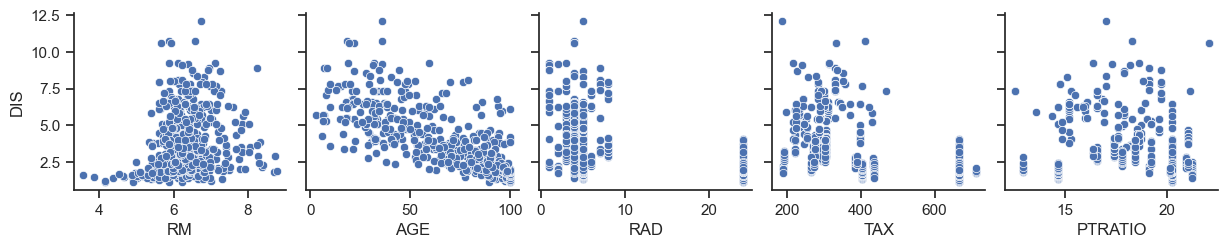

### DIS vs B, LSTAT, target

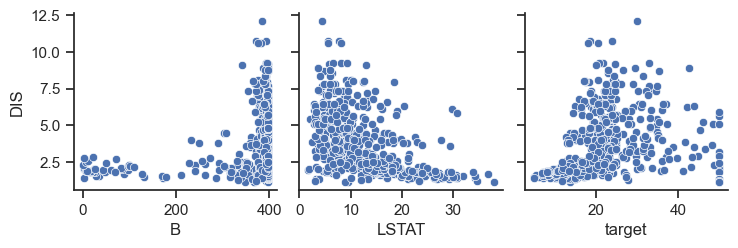

## RAD

### RAD vs CRIM, ZN, INDUS, CHAS, NOX

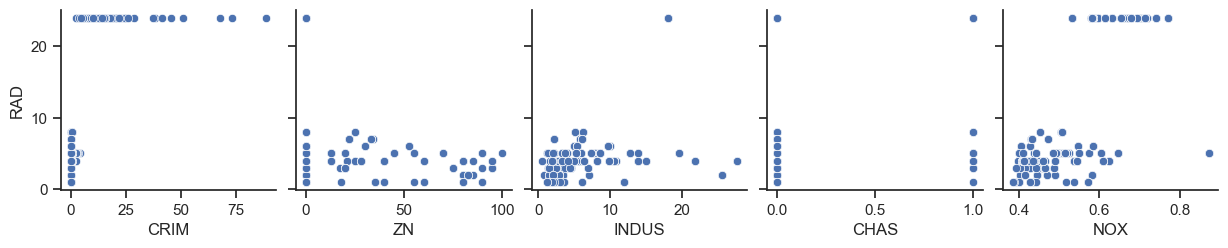

### RAD vs RM, AGE, DIS, TAX, PTRATIO

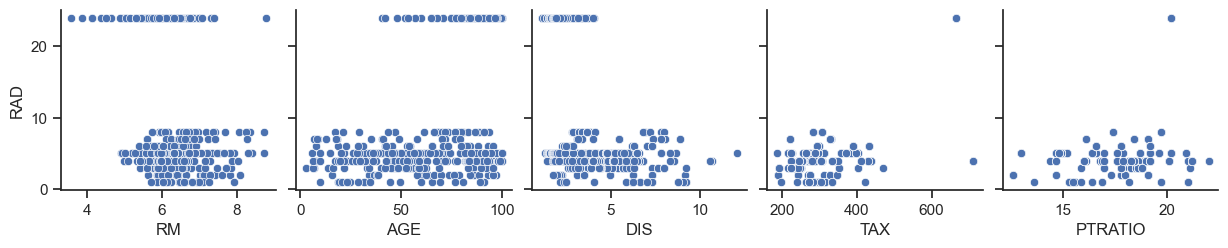

### RAD vs B, LSTAT, target

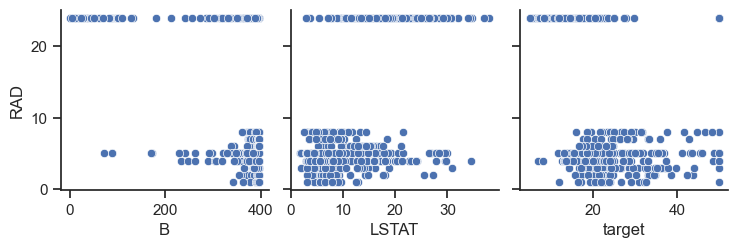

## TAX

### TAX vs CRIM, ZN, INDUS, CHAS, NOX

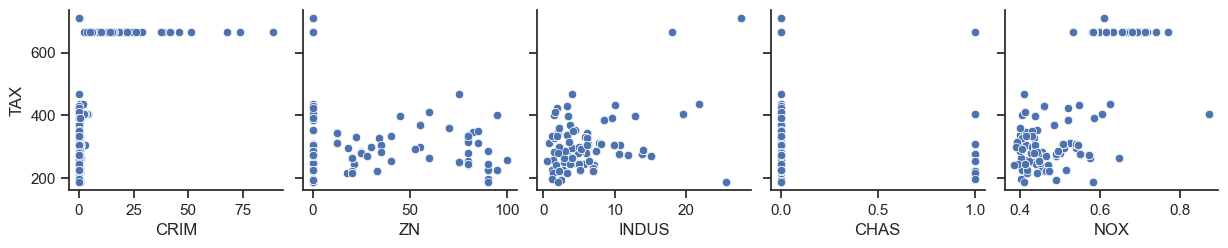

### TAX vs RM, AGE, DIS, RAD, PTRATIO

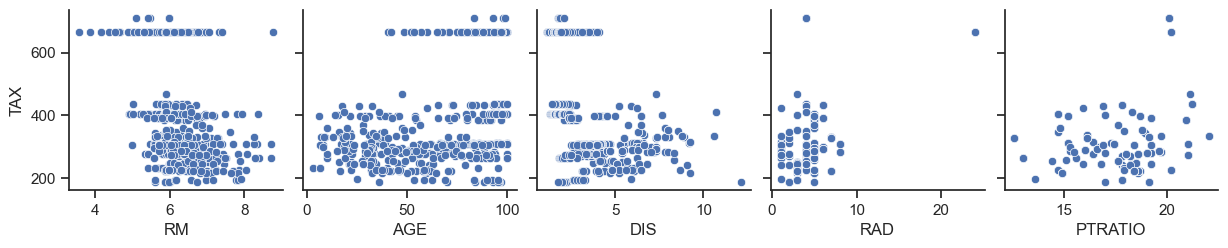

### TAX vs B, LSTAT, target

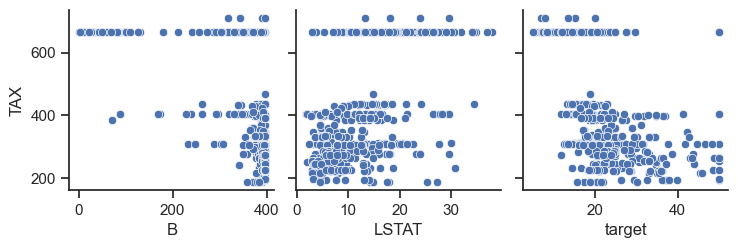

## PTRATIO

### PTRATIO vs CRIM, ZN, INDUS, CHAS, NOX

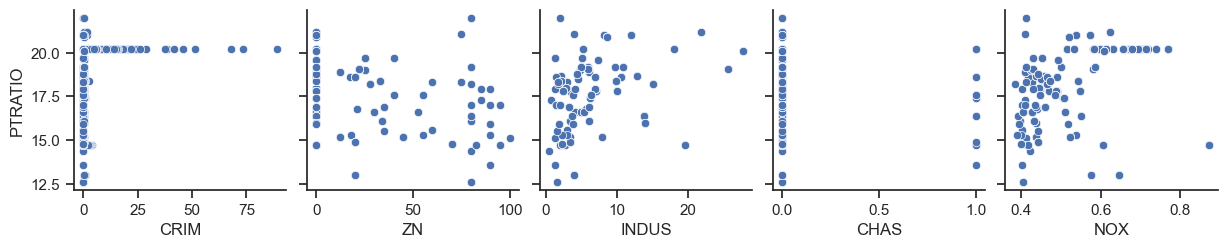

### PTRATIO vs RM, AGE, DIS, RAD, TAX

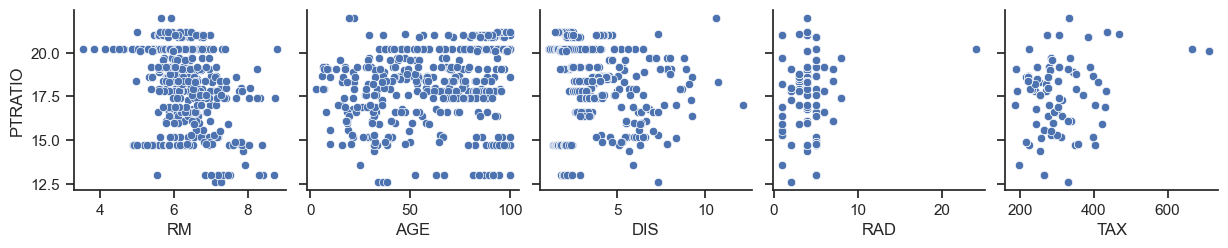

### PTRATIO vs B, LSTAT, target

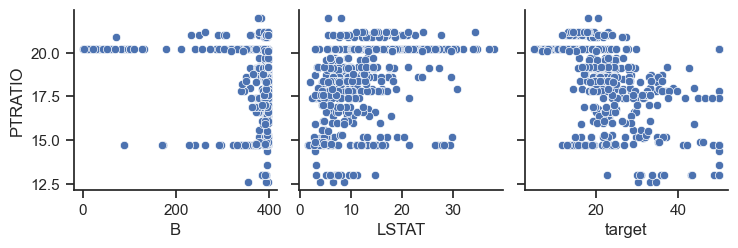

## B

### B vs CRIM, ZN, INDUS, CHAS, NOX

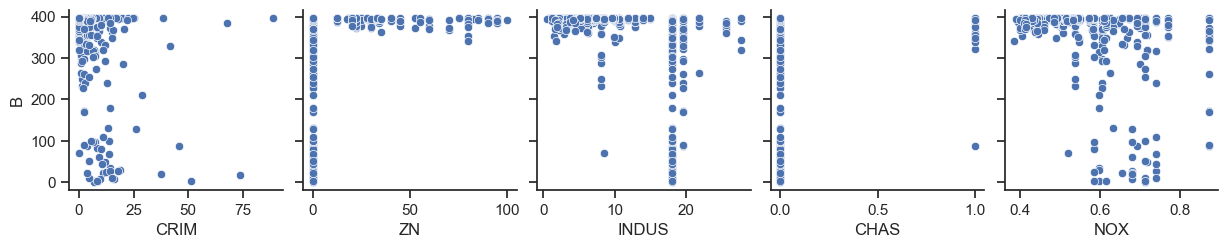

### B vs RM, AGE, DIS, RAD, TAX

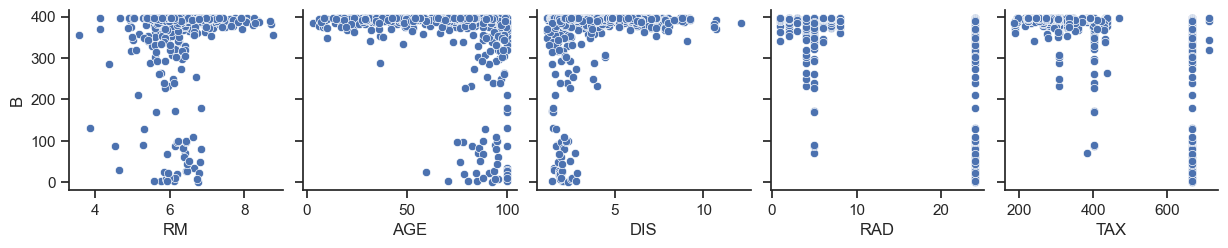

### B vs PTRATIO, LSTAT, target

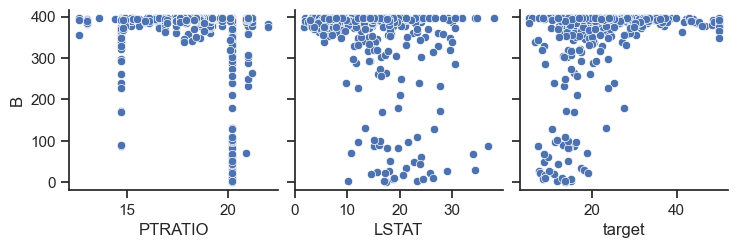

## LSTAT

### LSTAT vs CRIM, ZN, INDUS, CHAS, NOX

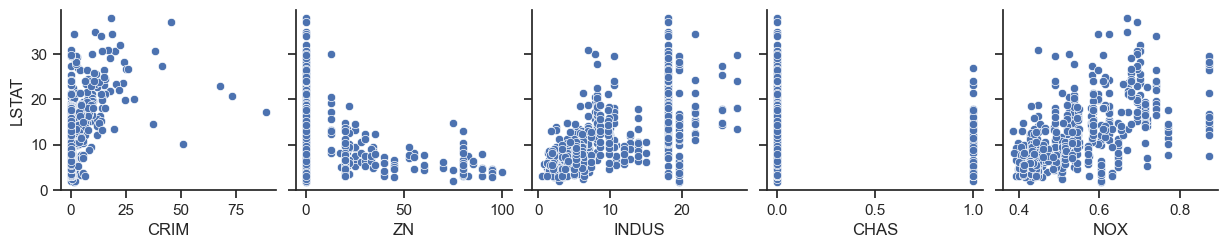

### LSTAT vs RM, AGE, DIS, RAD, TAX

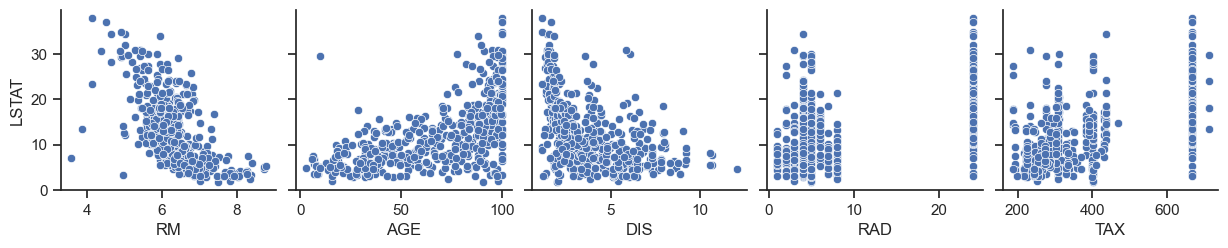

### LSTAT vs PTRATIO, B, target

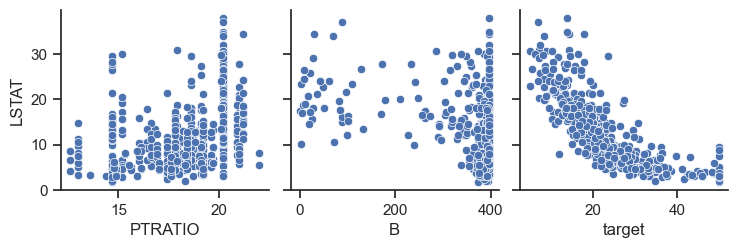

## target

### target vs CRIM, ZN, INDUS, CHAS, NOX

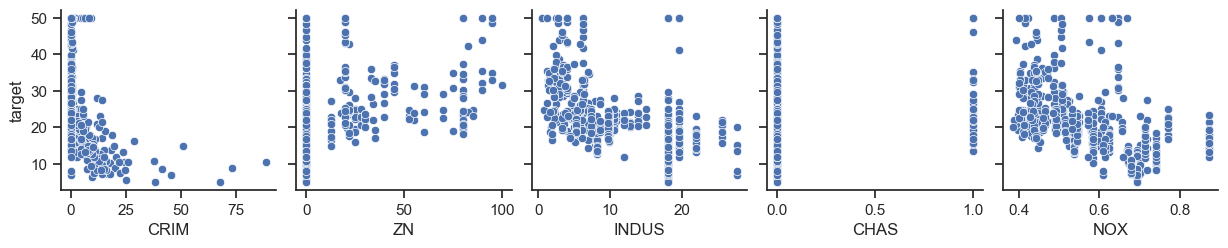

### target vs RM, AGE, DIS, RAD, TAX

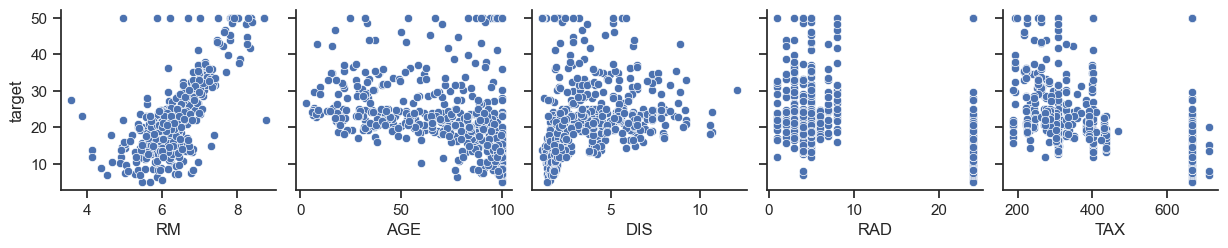

### target vs PTRATIO, B, LSTAT

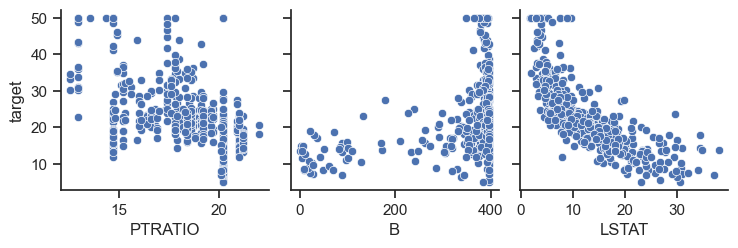

In [6]:
# As the above pairplots looks cluttered , it is hard to understand , so making the 5 plots per line

vars_per_line = 5
all_vars = list(boston.columns)

for var in all_vars:
    rest_vars = list(all_vars)
    rest_vars.remove(var)
    display(Markdown(f"## {var}"))
    while rest_vars:
        line_vars = rest_vars[:vars_per_line]
        del rest_vars[:vars_per_line]
        line_var_names = ", ".join(line_vars)
        display(Markdown(f"### {var} vs {line_var_names}"))
        sns.pairplot(boston, x_vars=line_vars, y_vars=[var], palette='bright', )
        plt.show()
        plt.close()


##### Insights
- Crime and age have positive relationship. With increase in age, crime also increases
- More crimes are committed where tax rate is higher
- Crime is more where it has access to highways
- Crime is low where more number of employment offices are there so with increase in dis values, crime decreases
- Interestingly with increase in age the nox also increases
- By other graphs we can notice that the below features has relationship with each other
    - zn: indus, nox, age, lstat
    - indus: age, dis
    - nox: age, dis
    - lstat: medv

### C) Are any of the predictors associated with per capita crime rate? If so, explain the relationship

<AxesSubplot:>

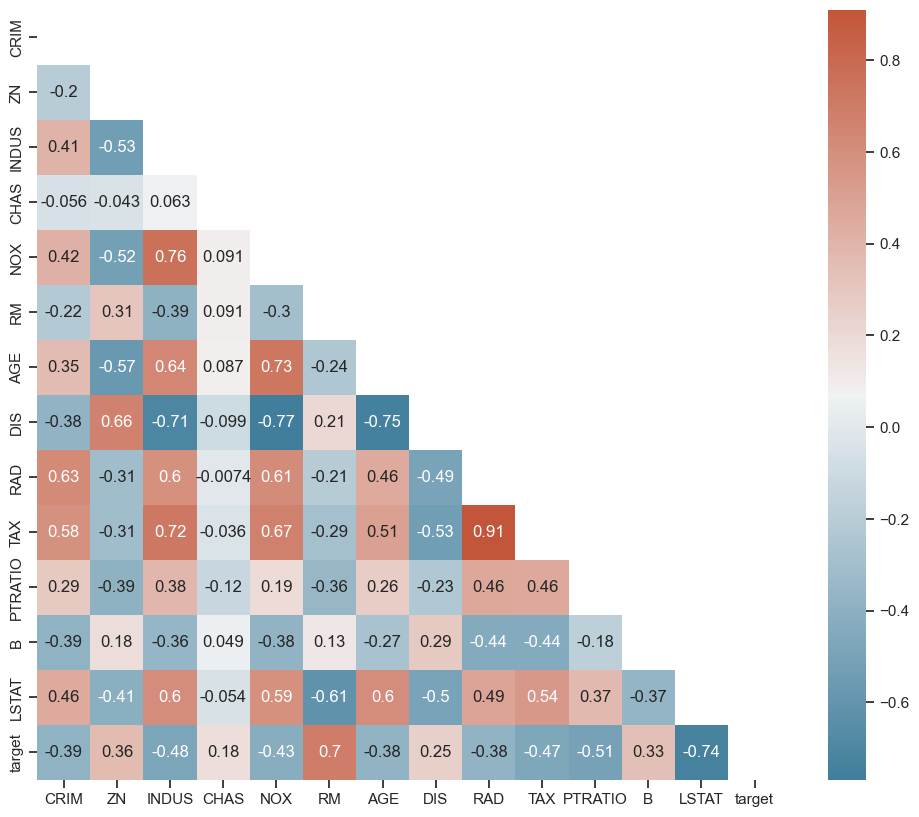

In [12]:
corr=boston.corr()
f, ax = plt.subplots(figsize=(12,10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

##### Insights
- Crime is moderately correlated with radial highways, lstat and tax. Also,crime rate has either low correlation or    negative correlation with other variables such as RM, ZN and CHAS
- Variables such as NOX & INDUS, AGE & NOX, TAX & RAD and MEDV & RM are having strong positive correlation. 
- Variables include MEDV & LSTAT, DIS & INDUS, DIS & NOX, and DIS & AGE have negative correlation
- There are various attributes with correlation values that are close to zero


### d) Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.


In [16]:
boston_crime=boston.sort_values(by= ['CRIM','TAX','PTRATIO'],ascending=False).head(1)
boston_crime[['CRIM','TAX','PTRATIO']]

CRIM    TAX  PTRATIO
380  88.9762  666.0     20.2

##### Insights
- There is a significant gap between suburbs with high tax rates and a peak between 660 and 680.
- Cities to have a crime rate > 20, reaching to above 80


### e) How many of the suburbs in this data set bound the Charles river?

In [36]:
house_count=len(boston[boston['CHAS'] == 1])
print(f'There are {house_count} houses located near a river')
perc_pop= len(boston[boston['CHAS'] == 1]) / len(boston)*100
print(f'Only {perc_pop} of population bound the charles river')


There are 35 houses located near a river
Only 6.91699604743083 of population bound the charles river


### f) What is the median pupil-teacher ratio among the towns in this data set?


In [23]:
print('The median of pupil-teacher ratio among the towns is: ',boston['PTRATIO'].median())

The median of pupil-teacher ratio among the towns is:  19.05


### g) Which suburb of Boston has lowest median value of owner occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.




In [38]:
boston[boston['target'] == boston['target'].min()].head(1)
stat_df = boston.describe().T
stat_df = stat_df[['mean','25%','50%','75%']]
stat_df.T

CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
398  38.3518  0.0   18.1   0.0  0.693  5.453  100.0  1.4896  24.0  666.0   

     PTRATIO      B  LSTAT  target  
398     20.2  396.9  30.59     5.0

CRIM         ZN      INDUS     CHAS       NOX        RM        AGE  \
mean  3.613524  11.363636  11.136779  0.06917  0.554695  6.284634  68.574901   
25%   0.082045   0.000000   5.190000  0.00000  0.449000  5.885500  45.025000   
50%   0.256510   0.000000   9.690000  0.00000  0.538000  6.208500  77.500000   
75%   3.677083  12.500000  18.100000  0.00000  0.624000  6.623500  94.075000   

           DIS        RAD         TAX    PTRATIO           B      LSTAT  \
mean  3.795043   9.549407  408.237154  18.455534  356.674032  12.653063   
25%   2.100175   4.000000  279.000000  17.400000  375.377500   6.950000   
50%   3.207450   5.000000  330.000000  19.050000  391.440000  11.360000   
75%   5.188425  24.000000  666.000000  20.200000  396.225000  16.955000   

         target  
mean  22.532806  
25%   17.025000  
50%   21.200000  
75%   25.000000

##### Insights
- At or above 3rd quartile variables: tax, crim, indus,nox, ptratio, lstat
- Age, rad is at max, ZN, medv at min
- crim is above 3rd quartile which is more than ten times of the mean CRIM.
- chas at min ( which means not bounded by the river)
- rm is below 1st quartile
- dis is below 1st quartile
- black is at max; above 1st quartile

### h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.





In [39]:
print('Greater than 7 rooms per dwelling: ',len(boston[boston['RM']>7]))
print('Greater than 8 rooms per dwelling: ',len(boston[boston['RM']>8]))

# check avg for more than 8 rooms per dwelling
stat_rm = boston[boston['RM']>8].describe().T
stat_rm = stat_rm[['mean','25%','50%','75%']]
stat_rm.T


stat_df=boston.describe().T
stat_df = stat_df[['mean','25%','50%','75%']]
stat_df.T


Greater than 7 rooms per dwelling:  64
Greater than 8 rooms per dwelling:  13


CRIM         ZN     INDUS      CHAS       NOX        RM        AGE  \
mean  0.718795  13.615385  7.078462  0.153846  0.539238  8.348538  71.538462   
25%   0.331470   0.000000  3.970000  0.000000  0.504000  8.247000  70.400000   
50%   0.520140   0.000000  6.200000  0.000000  0.507000  8.297000  78.300000   
75%   0.578340  20.000000  6.200000  0.000000  0.605000  8.398000  86.500000   

           DIS       RAD         TAX    PTRATIO           B  LSTAT  target  
mean  3.430192  7.461538  325.076923  16.361538  385.210769   4.31    44.2  
25%   2.288500  5.000000  264.000000  14.700000  384.540000   3.32    41.7  
50%   2.894400  7.000000  307.000000  17.400000  386.860000   4.14    48.3  
75%   3.651900  8.000000  307.000000  17.400000  389.700000   5.12    50.0

CRIM         ZN      INDUS     CHAS       NOX        RM        AGE  \
mean  3.613524  11.363636  11.136779  0.06917  0.554695  6.284634  68.574901   
25%   0.082045   0.000000   5.190000  0.00000  0.449000  5.885500  45.025000   
50%   0.256510   0.000000   9.690000  0.00000  0.538000  6.208500  77.500000   
75%   3.677083  12.500000  18.100000  0.00000  0.624000  6.623500  94.075000   

           DIS        RAD         TAX    PTRATIO           B      LSTAT  \
mean  3.795043   9.549407  408.237154  18.455534  356.674032  12.653063   
25%   2.100175   4.000000  279.000000  17.400000  375.377500   6.950000   
50%   3.207450   5.000000  330.000000  19.050000  391.440000  11.360000   
75%   5.188425  24.000000  666.000000  20.200000  396.225000  16.955000   

         target  
mean  22.532806  
25%   17.025000  
50%   21.200000  
75%   25.000000

##### Insights
- We can say that neighborhoods with more than 8 rooms per residence have much lower crime rate.
- Additionally, these have significantly higher prices than the general mean price of the entire dataset and have significantly less LSTAT value than their target value.


# CHAPTER 3

## QUESTION 15
This problem involves the Boston data set, which we saw in the lab for this chapter will now try to predict per capita crime rate using the other variables in this data set

In [503]:
# load the dataset
boston_data = load_boston()
data = pd.DataFrame(data = boston_data['data'],columns = boston_data['feature_names'])
print(data.shape)
data.head()

(506, 13)


CRIM   ZN  INDUS  CHAS   NOX    RM  AGE    DIS  RAD   TAX  PTRATIO  \
0 0.00632 18.0   2.31   0.0 0.538 6.575 65.2   4.09  1.0 296.0     15.3   
1 0.02731  0.0   7.07   0.0 0.469 6.421 78.9 4.9671  2.0 242.0     17.8   
2 0.02729  0.0   7.07   0.0 0.469 7.185 61.1 4.9671  2.0 242.0     17.8   
3 0.03237  0.0   2.18   0.0 0.458 6.998 45.8 6.0622  3.0 222.0     18.7   
4 0.06905  0.0   2.18   0.0 0.458 7.147 54.2 6.0622  3.0 222.0     18.7   

       B  LSTAT  
0  396.9   4.98  
1  396.9   9.14  
2 392.83   4.03  
3 394.63   2.94  
4  396.9   5.33

### a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

---------------------------------------------------------------------------------
------------------------SUMMARY---------------------------------------------------------
Column name: ZN, P value:  5.506472107679206e-06 
Column name: ZN, Coeff:  -0.07393497740412301 



<AxesSubplot:xlabel='ZN', ylabel='CRIM'>

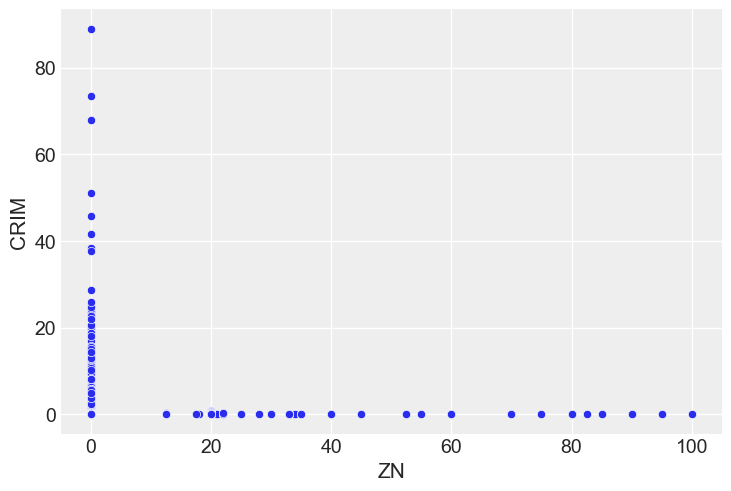

Column name: INDUS, P value:  1.4503489330273334e-21 
Column name: INDUS, Coeff:  0.5097763311042269 



<AxesSubplot:xlabel='INDUS', ylabel='CRIM'>

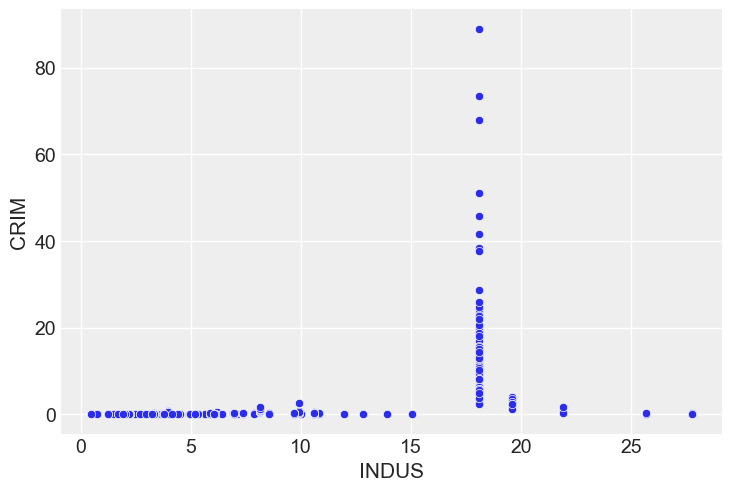

Column name: CHAS, P value:  0.20943450153520018 
Column name: CHAS, Coeff:  -1.8927765508037848 



<AxesSubplot:xlabel='CHAS', ylabel='CRIM'>

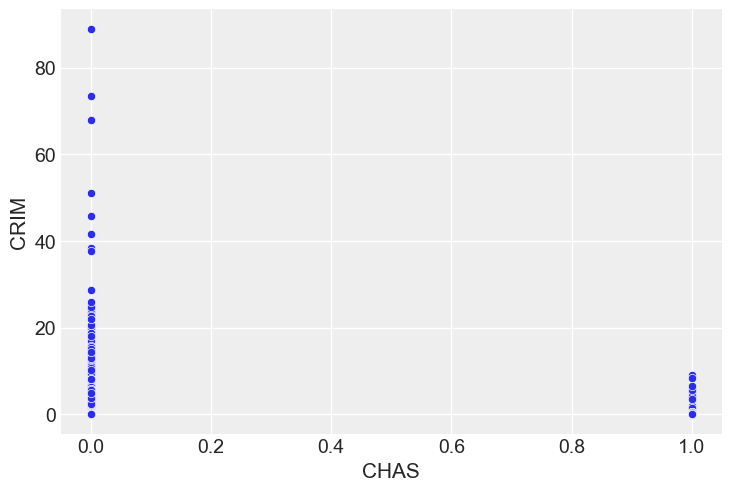

Column name: NOX, P value:  3.751739260356923e-23 
Column name: NOX, Coeff:  31.248531201122923 



<AxesSubplot:xlabel='NOX', ylabel='CRIM'>

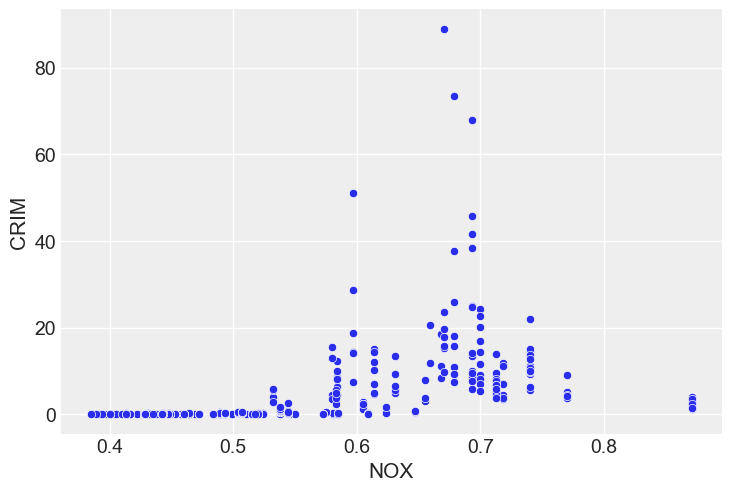

Column name: RM, P value:  6.346702984687782e-07 
Column name: RM, Coeff:  -2.68405122411395 



<AxesSubplot:xlabel='RM', ylabel='CRIM'>

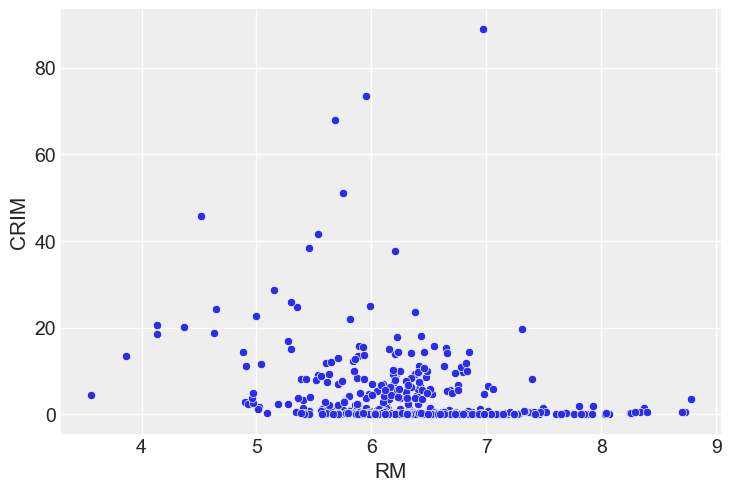

Column name: AGE, P value:  2.854869350244095e-16 
Column name: AGE, Coeff:  0.10778622713953297 



<AxesSubplot:xlabel='AGE', ylabel='CRIM'>

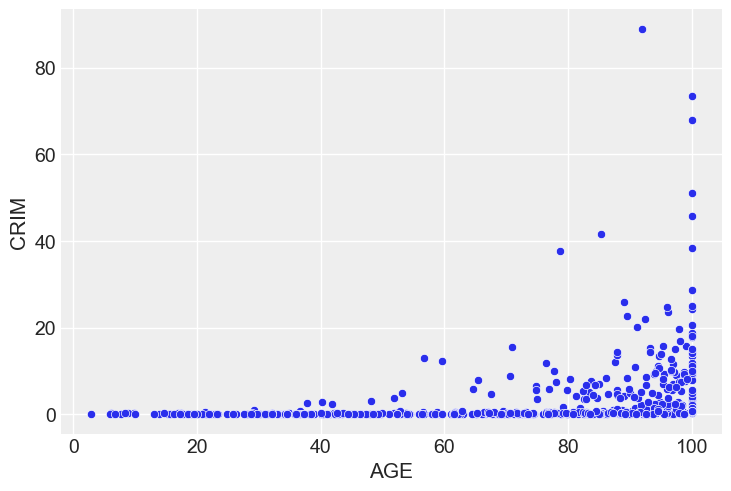

Column name: DIS, P value:  8.519948766926326e-19 
Column name: DIS, Coeff:  -1.5509016824100992 



<AxesSubplot:xlabel='DIS', ylabel='CRIM'>

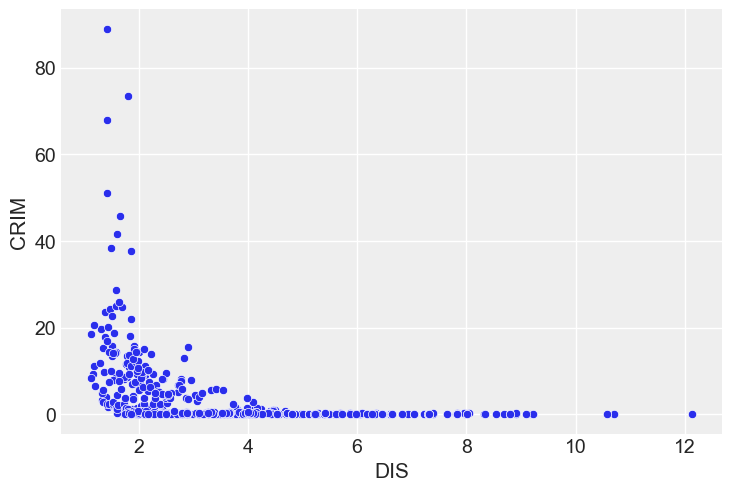

Column name: RAD, P value:  2.693844398185789e-56 
Column name: RAD, Coeff:  0.6179109273272022 



<AxesSubplot:xlabel='RAD', ylabel='CRIM'>

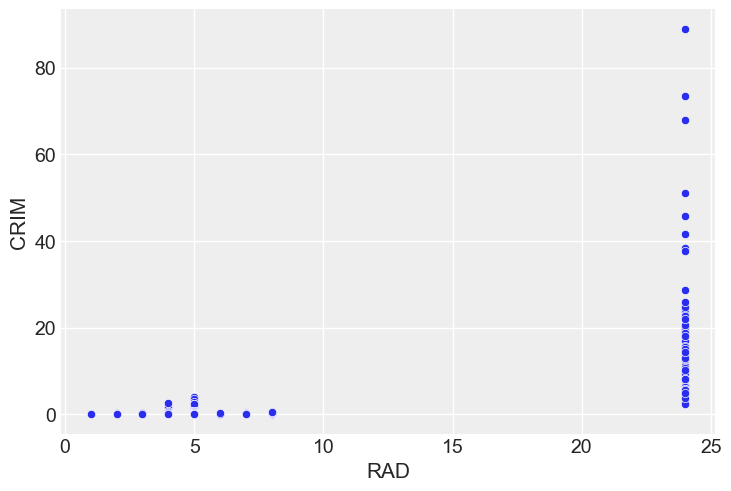

Column name: TAX, P value:  2.357126835256544e-47 
Column name: TAX, Coeff:  0.029742252822765325 



<AxesSubplot:xlabel='TAX', ylabel='CRIM'>

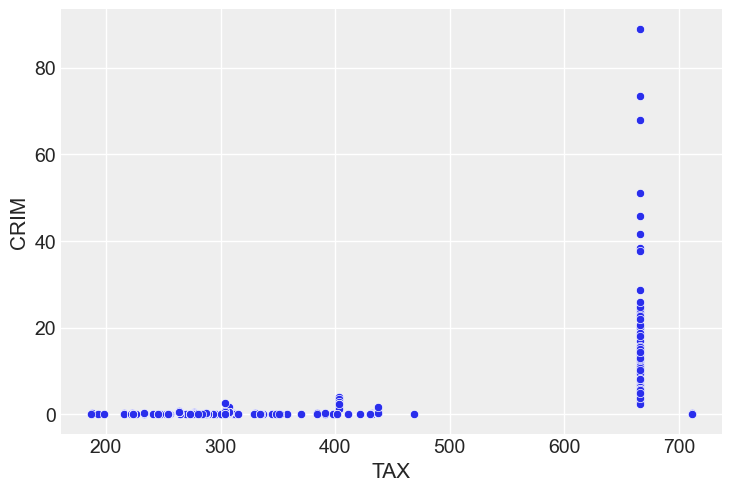

Column name: PTRATIO, P value:  2.9429224473598156e-11 
Column name: PTRATIO, Coeff:  1.1519827870705903 



<AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>

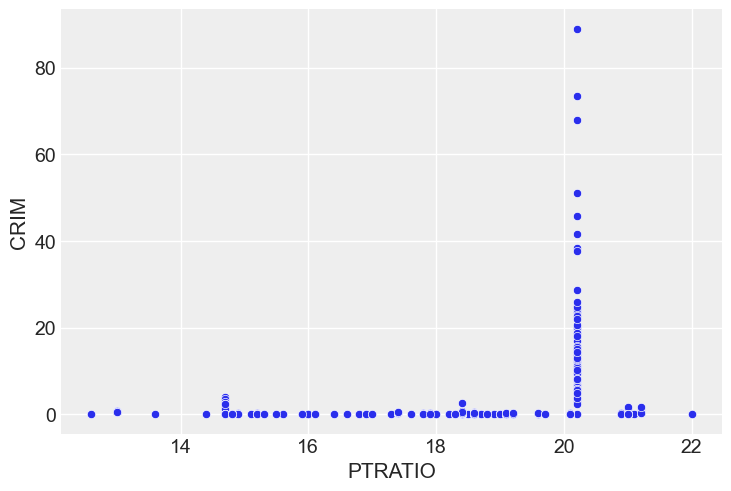

Column name: B, P value:  2.487273973773681e-19 
Column name: B, Coeff:  -0.0362796405673308 



<AxesSubplot:xlabel='B', ylabel='CRIM'>

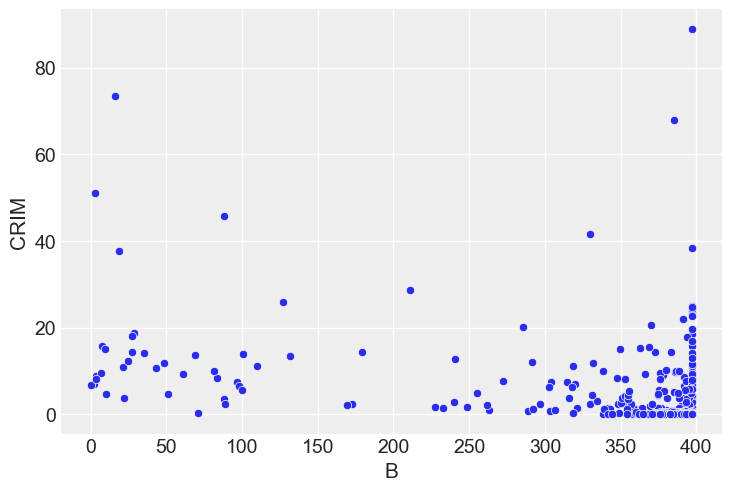

Column name: LSTAT, P value:  2.6542772314731968e-27 
Column name: LSTAT, Coeff:  0.548804782062398 



<AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>

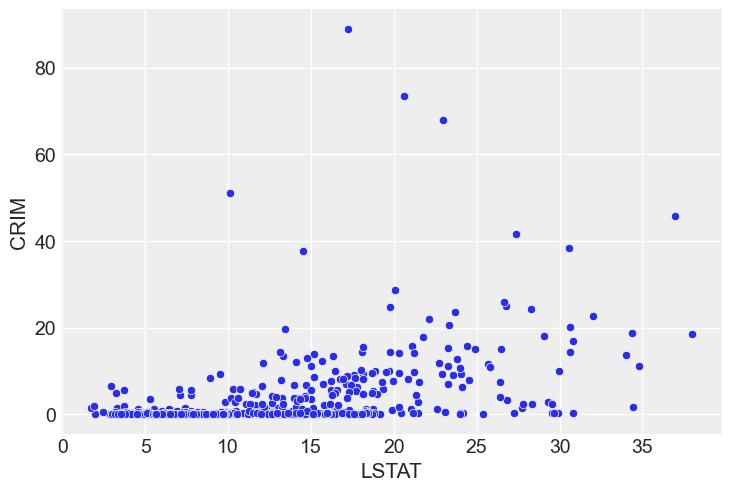

The dictionary for variables p value
{'ZN': 5.506472107679206e-06, 'INDUS': 1.4503489330273334e-21, 'CHAS': 0.20943450153520018, 'NOX': 3.751739260356923e-23, 'RM': 6.346702984687782e-07, 'AGE': 2.854869350244095e-16, 'DIS': 8.519948766926326e-19, 'RAD': 2.693844398185789e-56, 'TAX': 2.357126835256544e-47, 'PTRATIO': 2.9429224473598156e-11, 'B': 2.487273973773681e-19, 'LSTAT': 2.6542772314731968e-27}


In [504]:
coeff_list = []
predictor=[]
for column in data.columns:
    if column!='CRIM':
        predictor.append(column)
print('---------------------------------------------------------------------------------')
print('------------------------SUMMARY---------------------------------------------------------')

p_dict={}

for column in predictor: # iterating through predictos to run OLS model
    result = smf.ols('CRIM ~ {}'.format(column),data = data).fit()
    
    print('Column name: {}, P value:  {} '.format(column,result.pvalues[column]))
    keys=column
    p_dict[keys]=result.pvalues[column]
    
    print('Column name: {}, Coeff:  {} '.format(column,result.params[column]))
    print('')
    coeff_list.append(result.params[column])
    sns.scatterplot(x=data[column],y=data['CRIM'],cmap='viridis')
    plt.show()
print("The dictionary for variables p value")
print(p_dict)

In [515]:
coeff_list = []
predictor=[]
for column in data.columns:
    if column!='CRIM':
        predictor.append(column)
print('----------------------------------------------------------------------------------------')
print('-----------------------------------SUMMARY----------------------------------------------')

p_dict={}

for column in predictor: ## running ols model for each variable
    result = smf.ols('CRIM ~ {}'.format(column),data = data).fit()
    coeff_list.append(result.params[column])
    print(result.summary())

----------------------------------------------------------------------------------------
-----------------------------------SUMMARY----------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           5.51e-06
Time:                        19:16:03   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err

##### Insights
- RAD has approx 40% explainability while the other predictors either in range of 30's or too low Rsquared
- TAX also has around 35% model explainability
- By observing the p values we can say that every predictor has a significant relation with CRIM other than CHAS.

### b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?
 

In [516]:
all_predictor = ' + '.join(predictor)
print(all_predictor)
result = smf.ols('CRIM ~ {}'.format(all_predictor),data = data).fit()
print(result.summary())

ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           4.84e-55
Time:                        19:16:07   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

##### Insights
- Based on the p values criteria, only zn, dis, rad, black, and medv have a significant association with crim (p-value is below 0.05 which means we can reject the nuil hypothesis
- As we can see the distribution for RAD, with 95% CI we can say that it falls in the range of 0.367-0.711




### c) How do your results from
- 1.compare to your results from b)?
- 2.Create a plot displaying the univariate regression coefficients from a) on the x-axis, and the multiple regression coefficients from b) on the y-axis.


[0.036404847494391754, -0.06943527447504465, -1.3116668330572043, -6.92883557279313, -0.33479352091050685, 0.0013428154880085988, -0.7089342774167461, 0.5389164048538083, -0.0013559569241340548, -0.08338292505455389, -0.009595609193956387, 0.23564094943311076]


<AxesSubplot:>

<AxesSubplot:>

/var/folders/tm/88gb2w0553n4qjb9yr9nn8sc0000gn/T/ipykernel_50428/3307395621.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,color = 'red')


(-2.8758529246731768, 1.3437844876298173)

(-2.8758529246731768, 1.3437844876298173)

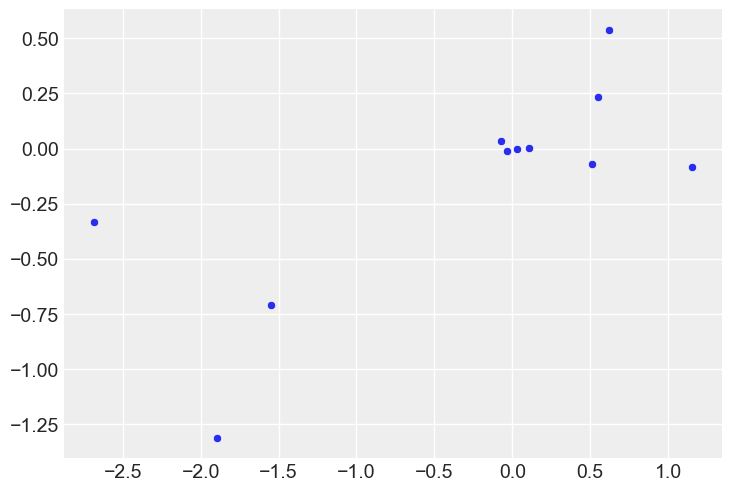

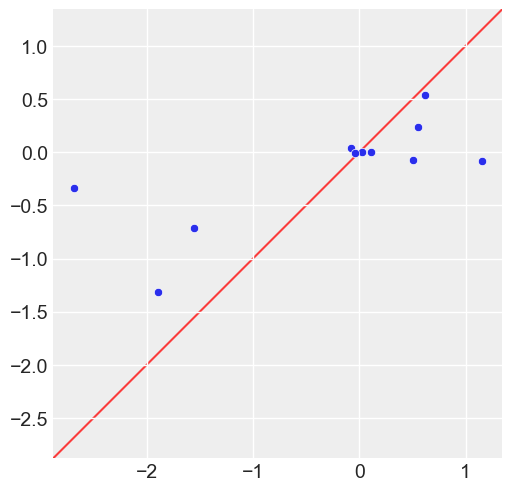

In [517]:
multiple_coefficients = [result.params[column] for col in predictor]

multiple_coefficients=[]
for column in predictor:
    multiple_coefficients.append(result.params[column])
print(multiple_coefficients)
#removing the outlier point for NOX
coeff_list.remove(31.248531201122923) # if you get error while running , please print coeff and multiple coeff to remove outlier
multiple_coefficients.remove(-6.92883557279313) #  check the outliers and run again 
#plt.ylim(-3,2)
sns.scatterplot(coeff_list,multiple_coefficients)

fig, ax = plt.subplots()
sns.scatterplot(coeff_list,multiple_coefficients)

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,color = 'red')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)



##### Insights
- From the above plot we can understand that the model aint performing great as values all are scattered and deviated from the line

### d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + epsilon

In [511]:
for col in predictor:
    print(col)
    result = smf.ols('CRIM ~ {0} + np.power({0},2) + np.power({0},3)'.format(col),data = data).fit()
    print(result.summary())
    result = smf.ols('CRIM ~{}'.format(col),data = data).fit()
    print(result.summary())
    print()
    print('--------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------')
    print()

ZN
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.28e-06
Time:                        19:11:18   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433  

##### Insights
- As you can see for ZN the R2 is 0.058 when it raised to power 2 and 3 also it has but p value is significant for base model and base model r2 is 0.040 , we can see the 0.018% of increase in model explainability
- For NOX also by powering the variables we boosted the accuracy by 0.19% also p value is significant
- for RAD p value is not significant either in base model or powered one.
- For PT Ratio R2 got increased by 0.084 to 0.114 when it got powered and p value is better in both the places and we can reject the null hypothesis


# CHAPTER 6

## QUESTION 9
In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [491]:
# Load the data
college = pd.read_csv('College.csv')
print(college.shape)
college.head(2)

(777, 19)


Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56

In [492]:
college.drop('Unnamed: 0',axis = 1,inplace = True)
college.columns
# ENCODING IT
college['Private'] = college['Private'].map({'Yes':1,'No':0})

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

### a) Split the data set into a training set and a test set.

In [493]:
X = college.drop(columns=['Apps'])
y = college['Apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('The Number of rows and columns in X_train is : ', X_train.shape)
print('The Number of rows and columns in X_test is : ', X_test.shape)
print('The Number of rows and columns in y_train is : ', y_train.shape)
print('The Number of rows and columns in y_test is : ', y_test.shape)

The Number of rows and columns in X_train is :  (543, 17)
The Number of rows and columns in X_test is :  (234, 17)
The Number of rows and columns in y_train is :  (543,)
The Number of rows and columns in y_test is :  (234,)


### b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [494]:
results_dict = {} # creating empty dictionary to insert all model results into one set
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('R squared score for the model is ',r2_score(y_test,pred))
results_dict['Least_squares'] = r2_score(y_test,pred)
print('Mean squared error for the model is', mean_squared_error(y_test, pred))
results_dict['Least_squares_MSE'] = mean_squared_error(y_test, pred)

LinearRegression()

R squared score for the model is  0.8573055984601683
Mean squared error for the model is 1931803.1942070618


### c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

RidgeCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        normalize=True, store_cv_values=True)

value of alpha is  0.0001
R squared score for the model is  0.8574398771343669
Mean squared error for the model is 1929985.323506239


Text(0.5, 0, 'Alphas')

Text(0, 0.5, 'MSE with cv = 5')

Text(0.5, 1.0, 'Ridge Regression')

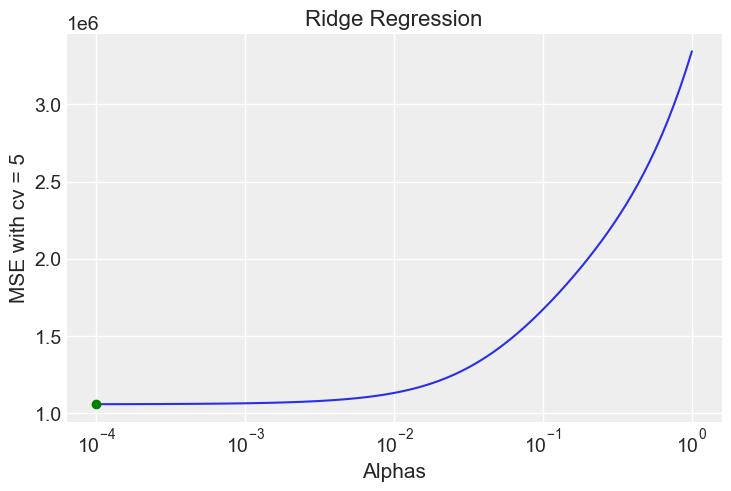

In [495]:
alphas = 10**(np.linspace(-4,0,100)) 
ridge_cv = RidgeCV(alphas = alphas,normalize=True,store_cv_values=True) # calling the ridge function
ridge_cv.fit(X_train,y_train) # fitting the model
print('value of alpha is ',ridge_cv.alpha_)
pred = ridge_cv.predict(X_test) # predicting with unseen data
print('R squared score for the model is ',r2_score(y_test,pred))
print('Mean squared error for the model is', mean_squared_error(y_test, pred))
results_dict['Ridge'] = r2_score(y_test,pred)
results_dict['Ridge_MSE'] = mean_squared_error(y_test, pred)
mse_v = ridge_cv.cv_values_
mse_errors = np.mean(mse_v,axis = 0)
plt.plot(ridge_cv.alphas,mse_errors)
plt.plot(ridge_cv.alpha_,np.min(mse_errors),marker = '.',markersize = 12,color = 'green')
plt.xscale('log')
plt.xlabel('Alphas')
plt.ylabel('MSE with cv = 5')
plt.title('Ridge Regression')
#plt.plot(I,'o');
pass

##### Insights
- We can further tune the model by looping through the alpha paramter range and can choose the better performing model and alpha but in this case we are sticking to only one


### d) Fit a lasso model on the training set, with λ chosen by cross- validation. Report the test error obtained, along with the number of non-zero coefficient estimates.


In [496]:
lasso_cv = Lasso(alpha = 0.05, normalize = True).fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)
pred = lasso_cv.predict(X_test)
print('R2 score is ',r2_score(y_test,lasso_pred))
results_dict['Lasso'] = r2_score(y_test,lasso_pred)
print('Mean squared error of lasso model is: ',mean_squared_error(y_test, lasso_pred))
results_dict['Lasso_MSE'] = mean_squared_error(y_test, lasso_pred)

R2 score is  0.8574290538310694
Mean squared error of lasso model is:  1930131.8498706678


In [497]:
# non zero coefficients
pd.Series(np.hstack([lasso_cv.intercept_,lasso_cv.coef_]),index = ['Intercept'] + list(X_train.columns))

Intercept       -628.5999428617779
Private          -552.093522950885
Accept          1.7451041983545645
Enroll         -1.2623782388773033
Top10perc       31.973131027093068
Top25perc      -3.0566596143846123
F.Undergrad   0.029418732882587346
P.Undergrad   0.019667328032028426
Outstate      -0.07814006055843292
Room.Board     0.13578147609508673
Books          0.18440924492073354
Personal        0.0779659758823384
PhD             -9.196884733764275
Terminal       -0.9961456114802384
S.F.Ratio       18.680018288717857
perc.alumni       0.99920341487945
Expend          0.0621261337716899
Grad.Rate        7.507441120661673
dtype: float64

### e) Fit a PCR model on the training set, with M chosen by cross- validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [174]:
number_components = np.arange(1,X_train.shape[1]) # creating number components
cv_score_pc = [] # creating empty list to store the cv score of linear model
for i in number_components:
    scaler = StandardScaler() # calling rhe standard scaler
    scaled_X = scaler.fit_transform(X_train) # transforming the train data
    pca = PCA(n_components=i)
    pc_X = pca.fit_transform(scaled_X)
    lin_model = LinearRegression() # run the model
    cv_score_pc.append(np.mean(cross_val_score(lin_model,pc_X,y_train,cv = 10)))

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'CV with k = 10')

Text(0.5, 1.0, 'Principal Components R')

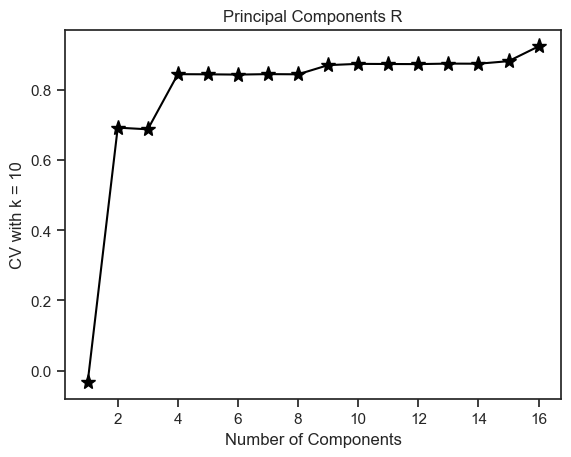

In [175]:
plt.plot(number_components,cv_score_pc,marker = '*',markersize=11,color='black')
plt.xlabel('Number of Components')
plt.ylabel('CV with k = 10')
plt.title('Principal Components R')

##### After running model for multiple number of components values like 4,5 and 10, only 17 components outperforms all the other results 

In [176]:
lin_model.fit(pc_X,y_train)
# In above cell already transformed the train, now we will have to transorm test as well
test_X_scaled = scaler.transform(X_test)
test_X_pc = pca.transform(test_X_scaled)
pred = lin_model.predict(test_X_pc)
print('R squared Score for principal components: ',r2_score(y_test,pred))
print('Mean squared error for principal components: ',mean_squared_error(y_test,pred))
results_dict['PCR'] = r2_score(y_test,pred) # adding the result to the main dictionary
results_dict['PCR_MSE'] = mean_squared_error(y_test, pred)

LinearRegression()

R squared Score for principal components:  0.8617391696948303
Mean squared error for principal components:  1871781.3084116764


### f ) Fit a PLS model on the training set, with M chosen by cross- validation. Report the test error obtained, along with the value of M selected by cross-validation.

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cross validation score - 5 fold')

Text(0.5, 1.0, 'Partial Least Square')

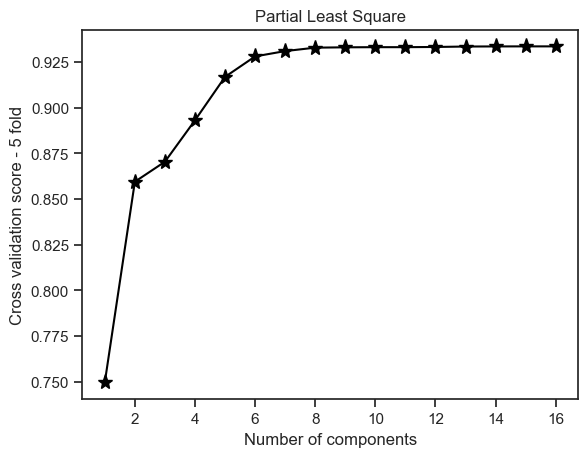

In [177]:
partial_cv = []
for i in number_components:
    pls = PLSRegression(n_components=i,scale = True)
    partial_cv.append(np.mean(cross_val_score(pls,X_train,y_train)))
plt.plot(number_components,partial_cv,marker = '*',markersize=11,color='black')
plt.xlabel('Number of components')
plt.ylabel('Cross validation score - 5 fold')
plt.title('Partial Least Square')

#### Based on the graph, we can conclude that components 16 achieved a maximum score of 94 percent so next I gonna test it with the unseen data 


In [178]:
# lets see how this model performs
pls = PLSRegression(n_components=16,scale = True)
pls.fit(X_train,y_train)
pred = pls.predict(X_test)
print('Score for PLS is ',r2_score(y_test,pred))
results_dict['PLS'] = r2_score(y_test,pred)
print('Mean squared error for principal components: ',mean_squared_error(y_test,pred))
results_dict['PLS_MSE'] = mean_squared_error(y_test, pred)

PLSRegression(n_components=16)

Score for PLS is  0.8573060959176537
Mean squared error for principal components:  1931796.459605361


### g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?


In [195]:
pd.options.display.float_format = '{:,}'.format
model_comparision= pd.DataFrame(list(results_dict.items()), columns=['Model', 'Result'])
print("Table for R squared and MSE Result for all the models")
model_comparision
# the one with out the suffixes is R2

Table for R squared and MSE Result for all the models


Model               Result
0      Least_squares   0.8573055984601683
1  Least_squares_MSE 1,931,803.1942070618
2              Ridge   0.8574398771343669
3          Ridge_MSE  1,929,985.323506239
4              Lasso   0.8574290538310694
5          Lasso_MSE 1,930,131.8498706678
6                PCR   0.8617391696948303
7            PCR_MSE 1,871,781.3084116764
8                PLS   0.8573060959176537
9            PLS_MSE  1,931,796.459605361

#### Insights
- All the algortihms have almost same model explainaibility which is almost around 85%. But comparitively PCR has slightly better margin than other models. Also, if you notice the mean squared error for PCR it is the minimum among other models. all the models with the help of predictors can predict with minimum of 85% explainibilty for college application

## QUESTION 11
We will now try to predict per capita crime rate in the Boston data set.

In [225]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data['target'] = load_boston().target
data.head(3)
results_dict={}
dict_trained = {}

CRIM   ZN  INDUS  CHAS   NOX    RM  AGE    DIS  RAD   TAX  PTRATIO  \
0 0.00632 18.0   2.31   0.0 0.538 6.575 65.2   4.09  1.0 296.0     15.3   
1 0.02731  0.0   7.07   0.0 0.469 6.421 78.9 4.9671  2.0 242.0     17.8   
2 0.02729  0.0   7.07   0.0 0.469 7.185 61.1 4.9671  2.0 242.0     17.8   

       B  LSTAT  target  
0  396.9   4.98    24.0  
1  396.9   9.14    21.6  
2 392.83   4.03    34.7

In [226]:
X=data.drop('target',axis=1)
y=data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('The Number of rows and columns in X_train is : ', X_train.shape)
print('The Number of rows and columns in X_test is : ', X_test.shape)
print('The Number of rows and columns in y_train is : ', y_train.shape)
print('The Number of rows and columns in y_test is : ', y_test.shape)

The Number of rows and columns in X_train is :  (354, 13)
The Number of rows and columns in X_test is :  (152, 13)
The Number of rows and columns in y_train is :  (354,)
The Number of rows and columns in y_test is :  (152,)


### a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

##### Linear Regression

In [227]:
lm = LinearRegression()
error = cross_val_score(lm,X,y,cv = 5,scoring = 'neg_mean_squared_error')
print('Error for best subset selection is ',-np.mean(error))
results_dict['least_squares_error'] = -np.mean(error)
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('R squared score for the model is ',r2_score(y_test,pred))
dict_trained['Least_squares_r2'] = r2_score(y_test,pred)
print('Mean squared error for the model is', mean_squared_error(y_test, pred))
dict_trained['Least_squares_MSE'] = mean_squared_error(y_test, pred)

Error for best subset selection is  37.13180746769898


LinearRegression()

R squared score for the model is  0.7112260057484936
Mean squared error for the model is 21.517444231177183


##### Ridge Regression

In [228]:

ridgecv = RidgeCV(alphas = 10**np.linspace(-4,0,100),normalize = True,store_cv_values=True)
ridgecv.fit(X,y)
print("The best score for ridge regression is ",ridgecv.score(X,y))
results_dict['Ridge_error'] = ridgecv.score(X,y)
ridge_cv = RidgeCV(alphas = 10**np.linspace(-4,0,100),normalize = True,store_cv_values=True) # doing it for trained model
ridge_cv.fit(X_train,y_train) # fitting the model
print('value of alpha is ',ridge_cv.alpha_)
pred = ridge_cv.predict(X_test) # predicting with unseen data
print('R squared score for the model is ',r2_score(y_test,pred))
print('Mean squared error for the model is', mean_squared_error(y_test, pred))
dict_trained['Ridge_R2'] = r2_score(y_test,pred)
dict_trained['Ridge_MSE'] = mean_squared_error(y_test, pred)

RidgeCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        normalize=True, store_cv_values=True)

The best score for ridge regression is  0.7404001357445218


RidgeCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        normalize=True, store_cv_values=True)

value of alpha is  0.022051307399030457
R squared score for the model is  0.7080906557309443
Mean squared error for the model is 21.751068866673545


In [229]:
pd.Series(np.hstack([ridgecv.intercept_,ridgecv.coef_]),index = ['Intercept'] + list(X.columns))
pd.Series(np.hstack([ridge_cv.intercept_,ridge_cv.coef_]),index = ['Intercept'] + list(X_train.columns))


Intercept          34.7691738806344
CRIM           -0.10372548074148497
ZN             0.043529691362777435
INDUS          0.005800890448843186
CHAS              2.743985661172624
NOX              -16.67390031136117
RM               3.8629785760891973
AGE         -0.00029911860770298143
DIS             -1.4162521932905585
RAD               0.270630135090861
TAX           -0.010645371933693174
PTRATIO         -0.9353668383210987
B              0.009288731128822314
LSTAT           -0.5162953461112246
dtype: float64

Intercept      28.778416654693626
CRIM         -0.12364080167040543
ZN            0.03013604757595009
INDUS        0.023880052702915867
CHAS           3.2528708586545028
NOX           -13.296923784992886
RM              4.105069952030673
AGE         -0.011331920005759758
DIS            -1.253463248822569
RAD           0.18464658103753154
TAX         -0.006196257041689435
PTRATIO        -0.875976382385882
B            0.011559294992813158
LSTAT         -0.5319043549598912
dtype: float64

##### Lasso Regression

In [230]:
lassocv = LassoCV(alphas = 10**np.linspace(-4,0,100),normalize = True,cv = 5)
lassocv.fit(X,y)
print("The best score for lasso is ",lassocv.score(X,y))
results_dict['Lasso'] = lassocv.score(X,y)
lasso_cv = Lasso(alpha = 0.05, normalize = True).fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)
pred = lasso_cv.predict(X_test)
print('R2 score is ',r2_score(y_test,lasso_pred))
print('Mean squared error of lasso model is: ',mean_squared_error(y_test, lasso_pred))
dict_trained['Lasso_R2'] = r2_score(y_test,lasso_pred)
dict_trained['Lasso_MSE'] = mean_squared_error(y_test, lasso_pred)

LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=5, normalize=True)

The best score for lasso is  0.724350476365379
R2 score is  0.6463814725788672
Mean squared error of lasso model is:  26.349211128299274


In [231]:
pd.Series(np.hstack([lassocv.intercept_,lassocv.coef_]),index = ['Intercept'] + list(X.columns))
pd.Series(np.hstack([lasso_cv.intercept_,lasso_cv.coef_]),index = ['Intercept'] + list(X_train.columns))

Intercept       24.45646030452159
CRIM        -0.046760603466134115
ZN            0.01847303120200838
INDUS         -0.0104522077926464
CHAS           2.4960249270962898
NOX           -10.351151371555227
RM              4.188158520035223
AGE                          -0.0
DIS            -0.894367800916593
RAD           0.01542689687006712
TAX                          -0.0
PTRATIO       -0.8381121553978356
B            0.007593402395078471
LSTAT         -0.5211290588964286
dtype: float64

Intercept      14.281242337999698
CRIM        -0.002644172368781138
ZN                            0.0
INDUS                        -0.0
CHAS            1.047540268772372
NOX                          -0.0
RM             3.8460120245847618
AGE                          -0.0
DIS                          -0.0
RAD                          -0.0
TAX                          -0.0
PTRATIO       -0.5669393637913279
B            0.003531060846635869
LSTAT         -0.5288913694156062
dtype: float64

##### Manual selection of features [SUBSET]

In [232]:
# manual selection of features
features = ['NOX','DIS','RAD','LSTAT']
lm = LinearRegression()
error = cross_val_score(lm,X[features],y,cv = 5,scoring = 'neg_mean_squared_error')
print('Error for best subset selection is ',-np.mean(error))
results_dict['Best_subset'] = -np.mean(error)

Error for best subset selection is  42.39177772191909


##### PCR 

In [233]:
number_components = np.arange(1,X_train.shape[1]) # creating number components
cv_score_pc = [] # creating empty list to store the cv score of linear model
for i in number_components:
    scaler = StandardScaler() # calling rhe standard scaler
    scaled_X = scaler.fit_transform(X_train) # transforming the train data
    pca = PCA(n_components=i)
    pc_X = pca.fit_transform(scaled_X)
    lm = LinearRegression()
    cv_score_pc.append(np.mean(cross_val_score(lm,pc_X,y_train,cv = 10)))
    
print('Error for best subset selection is ',-np.mean(error))
results_dict['PCR'] = -np.mean(error)


Error for best subset selection is  42.39177772191909


##### Insights
- I have tried to minimize the error with multiple models such as PCR, Linear Regression, Lasso, Ridge and Subset selection manually. 
- By observing the results of all the models we can see that subset performs better than all the models as we would be supplying only the required information or the variable which makes sense
- To prove above point, if you notice lasso intercepts the one with defined parameter performed better than the train and test data.

###  b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross- validation, or some other reasonable alternative, as opposed to using training error

In [236]:
pd.DataFrame(results_dict,index = ['Error']).T.sort_values(by = 'Error')
pd.DataFrame(dict_trained,index = ['R2_MSE']).T.sort_values(by = 'R2_MSE')

Error
Lasso                0.724350476365379
Ridge_error         0.7404001357445218
least_squares_error  37.13180746769898
Best_subset          42.39177772191909
PCR                  42.39177772191909

R2_MSE
Lasso_R2          0.6463814725788672
Ridge_R2          0.7080906557309443
Least_squares_r2  0.7112260057484936
Least_squares_MSE 21.517444231177183
Ridge_MSE         21.751068866673545
Lasso_MSE         26.349211128299274

##### Insights
- As I mentioned in the above answer, Lasso has least error compared to other model. Ridge falls in the similar range as lasso.
- By observing MSE and R squared for unseen datasets , we can say that Ridge has better model explainability and less MSE. Although it Lasso had less % of error but it was followed by ridge so after comparing all the summary we can conclude that Ridge outperformed all the other models

### c) Does your chosen model involve all of the features in the data set? Why or why not?
My suggested model is Ridge regression. Many features has coefficients zero, that we can understand by seeing the lasso output and lasso with less features also could not beat the ridge in terms of model explainibility or the error.
Without being feature engineered the ridge model outperformed all the other models so I am inclined with Ridge model for this dataset.I am sure, with features being reduced for ridge, the desired/expected reduction in errors can be achieved.

# CHAPTER 8

## QUESTION 8
In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.






In [243]:
# load the data
data=pd.read_csv('carseats.csv')
data.head(2)
data.shape

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0    9.5        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes

(400, 11)

In [310]:
df=data.copy()
# convert categorical to numerical using encoding methods
dict1 = {'Yes':1,'No':0}
df['Urban'] = df['Urban'].map(dict1)
df['US'] = df['US'].map(dict1)
df['ShelveLoc'] = df['ShelveLoc'].map({'Bad':0,'Good':1,'Medium':3})

In [311]:
X = df.drop(['Sales'], axis=1)
y = df.Sales

### a) Split the data set into a training set and a test set.

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("The number of records and attributes in the X_train data is ", X_train.shape)
print("The number of records and attributes in the X_test data is ", X_test.shape)
print("The number of records and attributes in the y_train data is ", y_train.shape)
print("The number of records and attributes in the y_test data is ", y_test.shape)

The number of records and attributes in the X_train data is  (280, 10)
The number of records and attributes in the X_test data is  (120, 10)
The number of records and attributes in the y_train data is  (280,)
The number of records and attributes in the y_test data is  (120,)


### b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

DecisionTreeRegressor()

4.803471666666667


<Figure size 1000x1000 with 0 Axes>

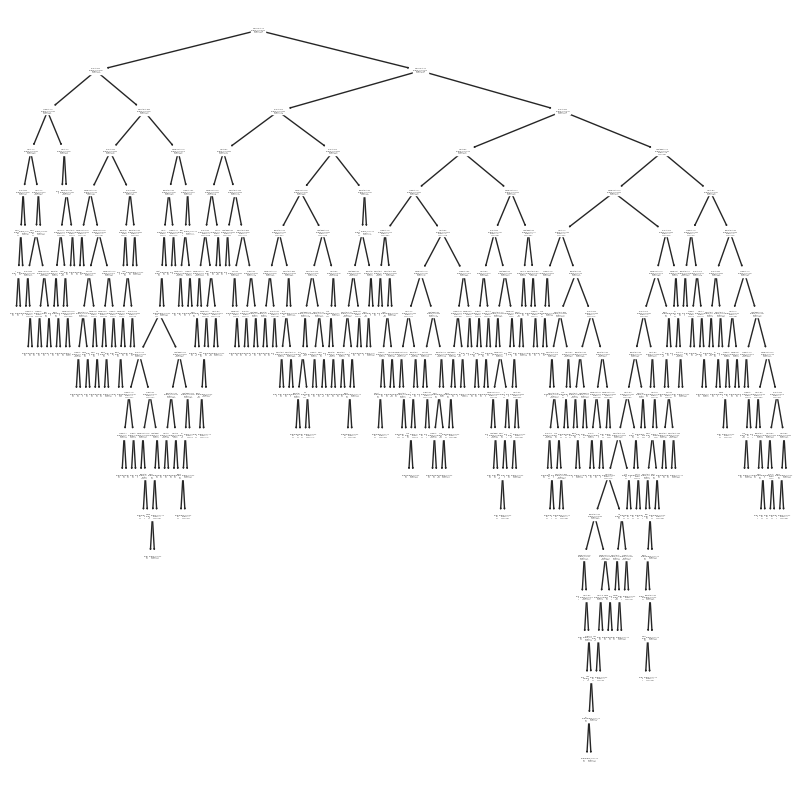

Test MSE is  4.803471666666667
Test R2 score is  0.28545469466133677


In [313]:
from sklearn import tree
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)
MSE = mean_squared_error(y_test,pred)
print(MSE)
plt.figure(figsize=(10,10))  # customize according to the size of your tree
_ = tree.plot_tree(model, feature_names = X.columns)
plt.show()

#test mse 
print('Test MSE is ',mean_squared_error(y_test,model.predict(X_test)))
print('Test R2 score is ',model.score(X_test,y_test)) # i
# the scores are pretty poor and the model is not great 

##### NOTE: Plotted the basic tree as Macbook M2 has issue with the fancy tree packages

### c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Max Depth of the tree')

Text(0, 0.5, '10 Cross Validate Error')

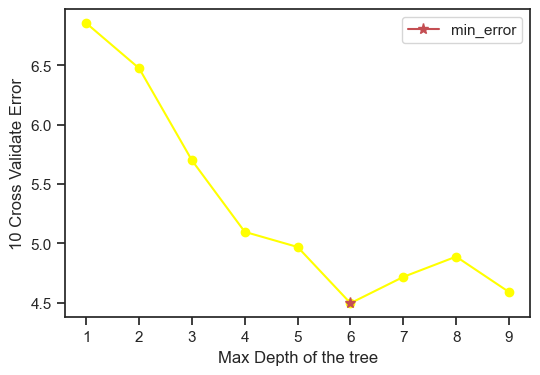

In [318]:
result_dict = {}
for max_depth in range(1,10):
    model = DecisionTreeRegressor(max_depth=max_depth)
    result_dict[max_depth] = -np.mean(cross_val_score(model,X_train,y_train,scoring = 'neg_mean_squared_error',cv=10))
plt.figure(figsize = (6,4))
plt.plot(list(result_dict.keys()),list(result_dict.values()),marker = 'o',color='yellow')
plt.plot(min(result_dict, key=result_dict.get),min(list(result_dict.values())),marker = '*',markersize = 8,c='r',label = 'min_error')
plt.legend()
plt.xlabel('Max Depth of the tree')
plt.ylabel('10 Cross Validate Error')


In [319]:
# from the above graph, we get 6 as the best value of max_depth
best_model = DecisionTreeRegressor(max_depth = 6)
best_model.fit(X_train,y_train)
print('Training MSE is ',mean_squared_error(y_train,best_model.predict(X_train)))
print('Test MSE is ',mean_squared_error(y_test,best_model.predict(X_test)))


DecisionTreeRegressor(max_depth=6)

Training MSE is  1.1684191984781092
Test MSE is  4.021594409723117


##### Insights
After pruning the tree test error has been reduced. Although it is not a major drop but we can see some decrease in the error


<Figure size 500x500 with 0 Axes>

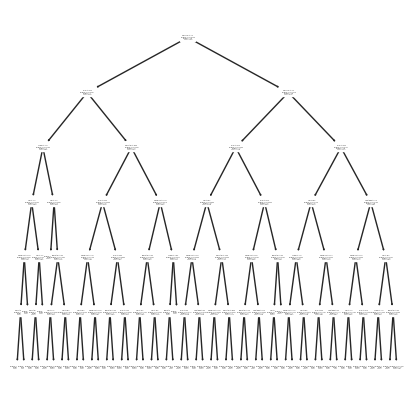

In [321]:
plt.figure(figsize=(5,5))  # customize according to the size of your tree
_ = tree.plot_tree(best_model, feature_names = X.columns)
plt.show()


### d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important.

BaggingRegressor(base_estimator=DecisionTreeRegressor())

The training MSE of the bagging model is  0.6150268178571429
The test MSE of the bagging model is  2.8851600166666667


<AxesSubplot:>

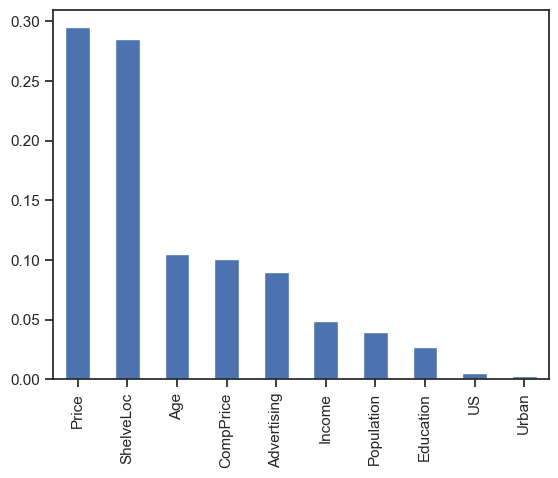

In [327]:
rm = DecisionTreeRegressor() # calling base reg model to unpack bagging
bagging = BaggingRegressor(rm)
bagging.fit(X_train,y_train)
print('The training MSE of the bagging model is ',mean_squared_error(y_train,bagging.predict(X_train)))
print('The test MSE of the bagging model is ',mean_squared_error(y_test,bagging.predict(X_test)))


#Using bagging we are getting a significant decrease in MSE to 1.15

# going through each of the estimator in bagging model to calculate feature importance
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
pd.Series(feature_importances,index = X_train.columns).sort_values(ascending=False).plot.bar()

##### Insights
Here also we can see the importance of features such as price and shelveloc but price is slightly more important when compared to shelveloc. Also, the test error has reduced to 2.8 from 4.02

###  e) Use random forests to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

RandomForestRegressor(max_features=10, random_state=1)

<AxesSubplot:>

Text(0.5, 0, 'Variable Importance')

The MSE for the RandomForestRegressor is  2.19104943


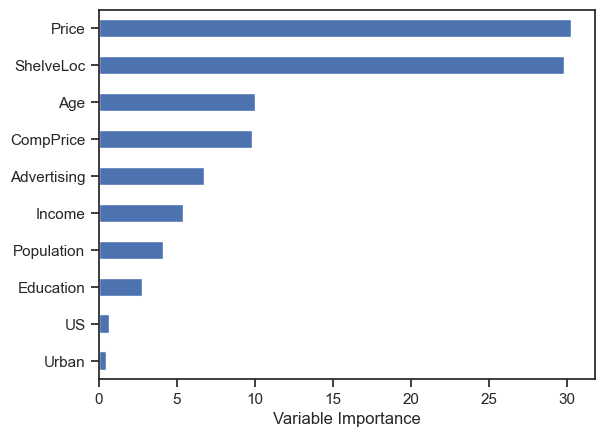

In [328]:
rf = RandomForestRegressor(max_features=len(X.columns), random_state=1)
rf.fit(X_train, y_train)

Imp = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X.columns)
Imp.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

MSE = mean_squared_error(y_test, rf.predict(X_test))
print('The MSE for the RandomForestRegressor is ', MSE)

RandomForestRegressor(max_features=1)

RandomForestRegressor(max_features=2)

RandomForestRegressor(max_features=3)

RandomForestRegressor(max_features=4)

RandomForestRegressor(max_features=5)

RandomForestRegressor(max_features=6)

RandomForestRegressor(max_features=7)

RandomForestRegressor(max_features=8)

RandomForestRegressor(max_features=9)

RandomForestRegressor(max_features=10)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Number of features considered for each split')

Text(0, 0.5, 'Test Error for the model')

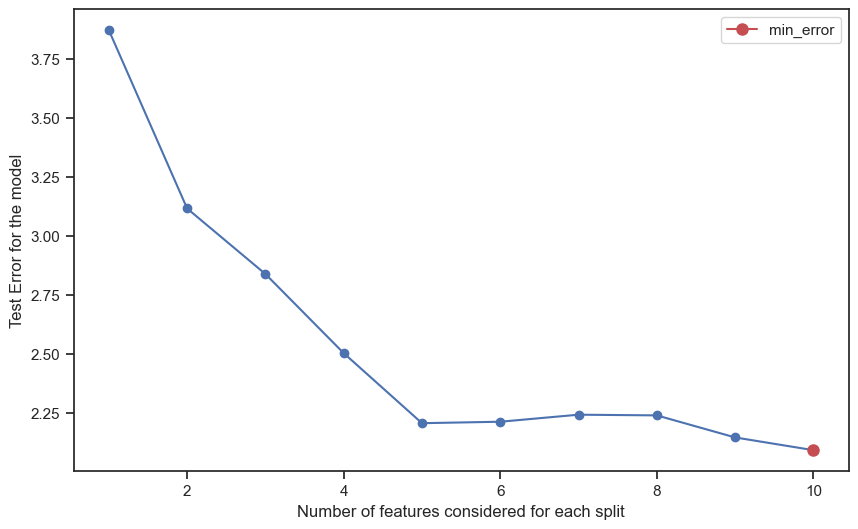

In [329]:
scores_dict = {}
for max_feature_value in range(1,11):
    rf = RandomForestRegressor(max_features=max_feature_value)
    rf.fit(X_train,y_train)
    scores_dict[max_feature_value] = mean_squared_error(y_test,rf.predict(X_test))
plt.figure(figsize = (10,6))
plt.plot(list(scores_dict.keys()),list(scores_dict.values()),marker = 'o')
plt.plot(min(scores_dict, key=scores_dict.get),min(list(scores_dict.values())),marker = 'o',markersize = 8,c='r',label = 'min_error')
plt.legend()
plt.xlabel('Number of features considered for each split')
plt.ylabel('Test Error for the model')

##### Insights
 - By observing the graph we can say that that price and Shelveloc are important features as concluded by bagging model.
 - Also test error got reduced from 2.8 to 2.19 which is best among all the other models
 - From the above graph we can say that Number of features to be considered for each split is 10
 

### f) Now analyze the data using BART, and report your results.

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
The acceptance probability does not match the target. It is 0.8959, but should be close to 0.8. Try to increase the number of tuning steps.


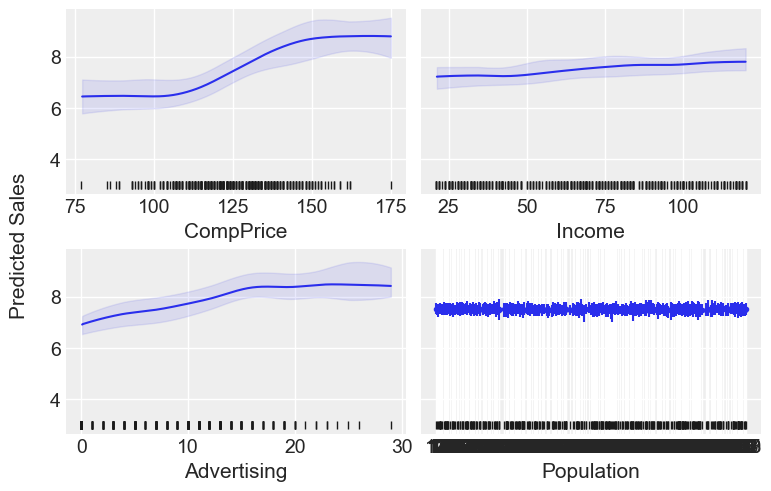

In [341]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-darkgrid") 

X = df[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']] # manually passing the variables
Y = df["Sales"]
with pm.Model() as model_sales:
    σ = pm.HalfNormal("σ", Y.std())
    μ = pmx.BART("μ", X, Y, m=50) # m is number of trees 
    y = pm.Normal("y", μ, σ, observed=Y)
    idata_sales= pm.sample(random_seed=RANDOM_SEED)

pmx.bart.plot_dependence(idata_sales, X=X, Y=Y, grid=(2, 2), var_discrete=[3]);


Note: To help us interpret the results of our model we are going to use partial dependence plot. This is a type of plot that shows the marginal effect that one covariate has on the predicted variable. That is, what is the effect that a covariate  has of  while we average over all the other covariates (). This type of plot are not exclusive of BART. But they are often used in the BART literature. 
PyMC provides an utility function to make this plot from the inference data.

- From this plot we can see the main effect of each covariate on the predicted value. This is very useful we can recover complex relationship beyond monotonic increasing or decreasing effects. For example for the compprice covariate we can see one drop around 100 and peak in 150

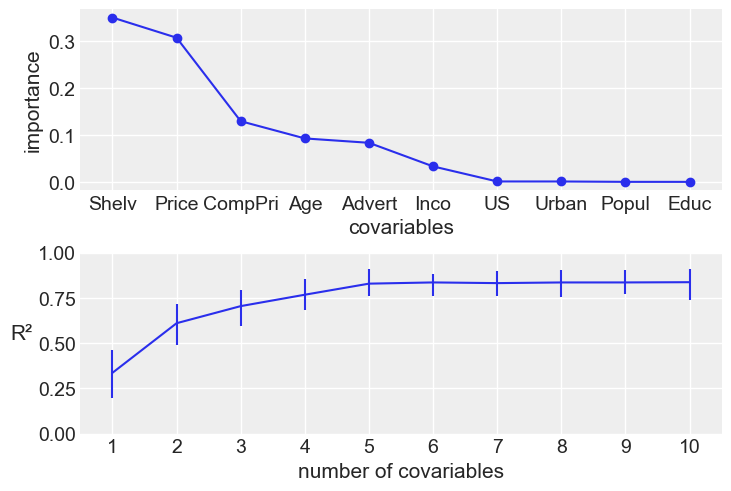

In [346]:
labels = ['CompPri', 'Inco', 'Advert', 'Popul', 'Price',
       'Shelv', 'Age', 'Educ', 'Urban', 'US']
pmx.bart.utils.plot_variable_importance(idata_sales, X.values, labels, samples=100);


##### Insights
Additionally, we provide a novel method to assess the variable importance. You can see an example in the bottom panel. On the x-axis we have the number of components (variables) and on the y-axis the Pearson correlation between the predictions made between the full-model (all variables included) and the restricted-models, those with only a subset of the variables in the full-model. The components are included following the relative variable importance order, as show in the top panel. Thus, in this example 1 component means shelvelocs, two components means shelvelocs and price, 3 components shelvelocs and price and compprice and so on. Hence, from the next figure we can see that even a model with a single component, shelveloc, is very close to the full model. Even more, the model with two components shelveloc, and price is on average indistinguishable from the full model. It is important to notice that to compute these correlations we do not resample the models, instead the predictions of the restricted-models are approximated from the full-model.
- From all the above models we can conclude that price and shelvelocs are important features in this dataset.

## QUESTION 11
This question uses the Caravan data set.


In [518]:
# load the data
data=pd.read_csv('caravan.csv')

In [519]:
df=data.copy()
df.shape
df['Purchase'] = df['Purchase'].map({'Yes':1,'No':0})

(5822, 86)

In [520]:
X = df.drop(columns='Purchase')
y = df.Purchase
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.82823771899, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1000, 85), (4822, 85), (1000,), (4822,))

### a) Create a training set consisting of the first 1,000 observations and a test set consisting of the remaining observations.

In [521]:
len(X_train), len(y_train)

(1000, 1000)

### b) Fit a boosting model to the training set with Purchase as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

The training score of xgb model is  0.998


<AxesSubplot:>

Text(0.5, 1.0, 'Top 10 important features')

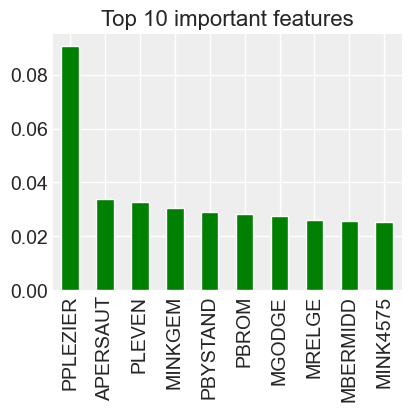

In [522]:
xgb = XGBClassifier(n_estimators=1000,gamma=0.01)
xgb.fit(X_train,y_train)
print('The training score of xgb model is ',xgb.score(X_train,y_train))
# feature importance
pd.Series(xgb.feature_importances_,index = X_train.columns).sort_values(ascending=False)[:10].plot.bar(figsize = (4,4),color='green')
plt.title('Top 10 important features')

##### Insights
From the above graph we can say that pplezier is more important feature and rest all have similar values and equal importance

### c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [523]:
print("Mean Squared Error of the boosting model is : ", mean_squared_error(y_test, xgb.predict(X_test)))

Mean Squared Error of the boosting model is :  0.07216922438822065


In [524]:
# if predicted prob > 0.2, then class 1, otherwise 0
pred_probs = xgb.predict_proba(X_test)[:,0]
pred_probs
pred_class = np.where(pred_probs>0.2,1,0)
print('Accuracy of the model is ',accuracy_score(y_test,pred_class))

array([0.999411  , 0.9999673 , 0.99984115, ..., 0.99994284, 0.9907757 ,
       0.9997234 ], dtype=float32)

Accuracy of the model is  0.06802156781418499


In [525]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_class)
pd.DataFrame(confusion_matrix,columns = ['Pred_0','Pred_1'],index = ['True_0','True_1'])
print(classification_report(y_test,pred_class))

Pred_0  Pred_1
True_0      49    4485
True_1       9     279

              precision    recall  f1-score   support

           0       0.84      0.01      0.02      4534
           1       0.06      0.97      0.11       288

    accuracy                           0.07      4822
   macro avg       0.45      0.49      0.07      4822
weighted avg       0.80      0.07      0.03      4822



In [526]:
# KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred_probas = knn.predict_proba(X_test)
pred_classes = np.where(pred_probas>0.2,1,0)[:,0]
print('Accuracy of the KNN model is ',accuracy_score(y_test,pred_classes))
print(classification_report(y_test,pred_classes))
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_probas = lr.predict_proba(X_test)
pred_classes = np.where(pred_probas>0.2,1,0)[:,0]
print('Accuracy of the Logistic Regression model is ',accuracy_score(y_test,pred_classes))
print(classification_report(y_test,pred_classes))

KNeighborsClassifier(n_neighbors=6)

Accuracy of the KNN model is  0.05972625466611364
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4534
           1       0.06      1.00      0.11       288

    accuracy                           0.06      4822
   macro avg       0.03      0.50      0.06      4822
weighted avg       0.00      0.06      0.01      4822



/Users/sunil/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunil/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunil/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunil/miniforge3/lib/

LogisticRegression()

Accuracy of the Logistic Regression model is  0.06055578598092078
              precision    recall  f1-score   support

           0       0.70      0.00      0.00      4534
           1       0.06      0.99      0.11       288

    accuracy                           0.06      4822
   macro avg       0.38      0.50      0.06      4822
weighted avg       0.66      0.06      0.01      4822



##### Insights
- As we can see the classification report of xgboost, knn and logistic regression the precision of the model is 6% which translates to out of all the predicted purchases only 6% of people actually made the purchase

# CHAPTER 10

## QUESTION 7
Fit a neural network to the Default data. Use a single hidden layer with 10 units, and dropout regularization. Have a look at Labs 10.9.1– 10.9.2 for guidance. Compare the classification performance of your model with that of linear logistic regression.


In [384]:
# load the dataset
data=pd.read_csv('default.csv')

In [407]:
df=data.copy()
df.shape
df['default']=df['default'].map({'No':0,"Yes":1})
df['student']=df['student'].map({'No':0,"Yes":1})
df.head(2)
X = df.drop(columns='default')
X=df[['student','balance','income']]
y = df.default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

(10000, 4)

default  student     balance       income
0        0        0 729.5264952 44,361.62507
1        0        1 817.1804066  12,106.1347

((7000, 3), (3000, 3), (7000,), (3000,))

In [437]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.4))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=15, batch_size=64,validation_data=(X_test, y_test))

In [449]:
model = Sequential()
model.add(Dense(10,activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=50,validation_data=(X_test, y_test))

Epoch 1/30


2022-07-31 01:16:08.545141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - 1s 5ms/step - loss: 0.4962 - accuracy: 0.9666 - val_loss: 0.4056 - val_accuracy: 0.9670
Epoch 2/30
  1/140 [..............................] - ETA: 0s - loss: 0.4295 - accuracy: 0.9600

2022-07-31 01:16:09.434784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - 1s 4ms/step - loss: 0.5027 - accuracy: 0.9666 - val_loss: 0.4002 - val_accuracy: 0.9670
Epoch 3/30
140/140 [==============================] - 1s 4ms/step - loss: 0.5378 - accuracy: 0.9666 - val_loss: 0.3961 - val_accuracy: 0.9670
Epoch 4/30
140/140 [==============================] - 1s 4ms/step - loss: 0.4949 - accuracy: 0.9666 - val_loss: 0.3927 - val_accuracy: 0.9670
Epoch 5/30
140/140 [==============================] - 1s 4ms/step - loss: 0.4955 - accuracy: 0.9666 - val_loss: 0.3898 - val_accuracy: 0.9670
Epoch 6/30
140/140 [==============================] - 1s 4ms/step - loss: 0.4858 - accuracy: 0.9666 - val_loss: 0.3872 - val_accuracy: 0.9670
Epoch 7/30
140/140 [==============================] - 1s 4ms/step - loss: 0.4978 - accuracy: 0.9666 - val_loss: 0.3848 - val_accuracy: 0.9670
Epoch 8/30
140/140 [==============================] - 1s 4ms/step - loss: 0.4844 - accuracy: 0.9666 - val_loss: 0.3826 - val_accuracy: 0.9670
Epoch 9/30
140/14

In [457]:
model=Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.4))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=10, batch_size=5,validation_data=(X_test, y_test))

Epoch 1/10


2022-07-31 01:20:59.961540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1387/1400 [============================>.] - ETA: 0s - loss: 0.5138 - accuracy: 0.9667

2022-07-31 01:21:04.680642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1400/1400 [==============================] - 6s 4ms/step - loss: 0.5156 - accuracy: 0.9666 - val_loss: 0.5090 - val_accuracy: 0.9670
Epoch 2/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.5156 - accuracy: 0.9666 - val_loss: 0.5090 - val_accuracy: 0.9670
Epoch 3/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.5156 - accuracy: 0.9666 - val_loss: 0.5090 - val_accuracy: 0.9670
Epoch 4/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.5156 - accuracy: 0.9666 - val_loss: 0.5090 - val_accuracy: 0.9670
Epoch 5/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.5156 - accuracy: 0.9666 - val_loss: 0.5090 - val_accuracy: 0.9670
Epoch 6/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.5156 - accuracy: 0.9666 - val_loss: 0.5090 - val_accuracy: 0.9670
Epoch 7/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.5156 - accuracy: 0.9666 - val_loss: 0.5090 - val_accuracy: 0.9670
Epo

In [458]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
pd.DataFrame(confusion_matrix ,columns = ['Pred_0','Pred_1'],index = ['True_0','True_1'])

LogisticRegression()

Accuracy of logistic regression classifier on test set: 0.96


Pred_0  Pred_1
True_0    2870      31
True_1      80      19

### INSIGHTS
- After encoding the categorical column, I used relu activation function with one layer, 10 units, epoch size 15, batch size 64, adam optimizer, dropout 0.3 and  the accuracy was 96.7%
- In the next trial I used softmax activation function with one layer, 10 units, epoch size 30, batch size 50, adam optimizer, dropout 0.4 and  the accuracy was 96.7%
- After many trials I realised that accuracy not going to change then I ran the logistic regression to compare with high end models, logistic regression also gave 96% accuracy. By observing all these results, we can stick to logistic regression for this dataset as it is easier to interpret, easier to explain and computation time is less.

#### As per Ockham's Razor  , one should not increase (beyond reason) the number of entities required to explain anything. All things being equal, the simplest soution is often the best solution


# PROBLEM 1

Beauty Pays!
Professor Daniel Hamermesh from UT’s economics department has been studying the im-
pact of beauty in labor income (yes, this is serious research!!).
First, watch the following video:
http://thedailyshow.cc.com/videos/37su2t/ugly-people-prejudice
It turns out this is indeed serious research and Dr. Hamermesh has demonstrated the effect
of beauty into income in a variety of different situations. Here’s an example: in the paper
“Beauty in the Classroom” they showed that “...instructors who are viewed as better looking
receive higher instructional ratings” leading to a direct impact in the salaries in the long
run. By now, you should know that this is a hard effect to measure. Not only one has to work
hard to figure out a way to measure “beauty” objectively (well, the video said it all!) but
one also needs to “adjust for many other determinants” (gender, lower division class, native
language, tenure track status).So, Dr. Hamermesh was kind enough to share the data for this paper with us. It is available in our class website in the file “BeautyData.csv”. In the file you will find, for a number
of UT classes, course ratings, a relative measure of beauty for the instructors, and other
potentially relevant variables.

- Using the data, estimate the effect of “beauty” into course ratings. Make sure to think about the potential many
  other determinants” Describe your analysis and your conclusions.
- In his paper, Dr. Hamermesh has the following sentence: “Disentangling whether this outcome represents productivity or discrimination is, as with the issue generally, probably impossible” Using the concepts we have talked about so far, what does he mean by that?

In [379]:
# load the dataset
data=pd.read_csv('BeautyData.csv')

In [380]:
df=data.copy()
df.shape
df.head(3)
df.dtypes

(463, 6)

CourseEvals  BeautyScore  female  lower  nonenglish  tenuretrack
0  3.235244675    0.2015666       1      0           0            1
1  3.226327535   -0.8260813       0      0           0            1
2  3.647711815   -0.6603327       0      0           0            1

CourseEvals    float64
BeautyScore    float64
female           int64
lower            int64
nonenglish       int64
tenuretrack      int64
dtype: object

In [381]:
result = smf.ols('CourseEvals ~ BeautyScore+female+lower+nonenglish+tenuretrack',data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            CourseEvals   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     48.58
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           2.71e-40
Time:                        00:00:03   Log-Likelihood:                -260.27
No. Observations:                 463   AIC:                             532.5
Df Residuals:                     457   BIC:                             557.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0654      0.051     79.020      

- This information allows us to identify the features that have a significant impact on rating evaluation. Although beauty has a higher coefficient value than other variables, we must examine other variables in great detail to uncover the possible reasons for the low score. first variable is female, here also we can't conclude that men are more potential than women also we don't know the exact causes behind it whether they are bias towards male teachers perhaps their content could be bad? or way of teaching is bad?, it could be anything but we cannot generalise here.same goes for division classes as some students might not be interested in the subject and sill have to participate then undoubtedly the rating would go down and same goes with non native speaker as well their content could be bad. Having considered all these aspects still we cannot capture those underlying reasons so it pretty obvious beauty contributes or influences the rating.

- The results and statistics available indicate that persons with more attractiveness receive higher ratings, but we cannot conclude that people without more beauty have less comprehension of the topic or are less able to draw in the audience. If we could gather more information and the underlying causes and turn them into predictors, we might be able to draw some conclusions; otherwise, this analysis would be meaningless.

# PROBLEM 2

Thefile
MidCity.xls available on the class website, contains data on 128 recent sales of
houses in a town. For each sale, the file shows the neighborhood in which the house is
located, the number of offers made on the house, the square footage, whether the house
is made out of brick, the number of bathrooms, the number of bedrooms, and the selling
price. Neighborhoods 1 and 2 are more traditional whereas 3 is a more modern, newer and
more prestigious part of town. Use regression models to estimate the pricing structure of
houses in this town and answer the following questions:

In [486]:
# LOAD THE DATASET
data=pd.read_csv('MidCity.csv')

In [489]:
df=data.copy()
df['Nbhd']=df['Nbhd'].map({1:'N1',2:'N2',3:'N3'})
df1=pd.get_dummies(df)
df1.head(2)

Home  Offers  SqFt  Bedrooms  Bathrooms   Price  Nbhd_N1  Nbhd_N2  Nbhd_N3  \
0     1       2  1790         2          2  114300        0        1        0   
1     2       3  2030         4          2  114200        0        1        0   

   Brick_No  Brick_Yes  
0         1          0  
1         1          0

### 1. Is there a premium for brick houses everything else being equal?

In [490]:
result = smf.ols('Price ~ Brick_Yes+SqFt+Offers+Nbhd_N2+Nbhd_N3+Bedrooms+Bathrooms',data = df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           8.25e-50
Time:                        11:33:56   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2159.4982   8877.810      0.243      0.8

##### Insights
By observing the graph we can say that brick is a significant factor while predicting the target variable as it is non zero also model has predictors which can explain 85% of pricing. With Confidence interval at 95% being greater than zero we can conclude that there is a premium for bricks


### 2. Is there a premium for houses in neighborhood 3?
Similar to the above question, we will have to rerun the model and check the values for neighborhood 3 to understand whether people pay premium. By noticing the values in the ols summary table we can find that N3 falls in range of [14446.33, 26915.75] with Confidence interval of 95% and CI values being greater than zero we can conclude that there ia a premium for houses in neighborhood 3.


### 3. is there an extra premium for brick houses in neighborhood 3 ?

In [500]:
df=data.copy()
df['Nbhd']=df['Nbhd'].map({1:'N1',2:'N2',3:'N3'})
df1=pd.get_dummies(df)
df1['Brick_N3']=df1['Brick_Yes']*df1['Nbhd_N3'] # creating interaction term
df1.head()
result = smf.ols('Price ~ Brick_Yes+Offers+SqFt+Nbhd_N2+Nbhd_N3+Bedrooms+Bathrooms+Brick_N3',data = df1).fit()
print(result.summary())

Home  Offers  SqFt  Bedrooms  Bathrooms   Price  Nbhd_N1  Nbhd_N2  Nbhd_N3  \
0     1       2  1790         2          2  114300        0        1        0   
1     2       3  2030         4          2  114200        0        1        0   
2     3       1  1740         3          2  114800        0        1        0   
3     4       3  1980         3          2   94700        0        1        0   
4     5       3  2130         3          3  119800        0        1        0   

   Brick_No  Brick_Yes  Brick_N3  
0         1          0         0  
1         1          0         0  
2         1          0         0  
3         1          0         0  
4         1          0         0

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           5.05e-50
Time:                        12:14:11   Log-Likelihood:                -1353.5
No. Observations:                 128   AIC:                             2725.
Df Residuals:                     119   BIC:                             2751.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3009.9934   8706.264      0.346      0.7

##### Insights
Here we have to create interaction feature for brick=1 and neigborhood3 and then check for 95% CI and our model result falls in between  [1933, 18429] which is greater than zero so we can conclude that there is an extra premium for neighborhood 3


### 4. For the purposes of prediction could you combine the neighborhoods 1 and 2 into a single “older” neighborhood?

In [501]:
df=data.copy()
df.Nbhd[df.Nbhd == 1] = 1 
df.Nbhd[df.Nbhd == 2] = 1
df.Nbhd[df.Nbhd == 3] = 0
df['Nbhd']=df['Nbhd'].map({1:'Old',0:'N3'})
df1=pd.get_dummies(df)
result = smf.ols('Price ~ Brick_Yes+Offers+SqFt+Bedrooms+Bathrooms+Nbhd_Old+Home',data = df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           9.59e-50
Time:                        12:42:31   Log-Likelihood:                -1356.8
No. Observations:                 128   AIC:                             2730.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.498e+04   9693.987      2.577      0.0

/var/folders/tm/88gb2w0553n4qjb9yr9nn8sc0000gn/T/ipykernel_50428/4242410442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Nbhd[df.Nbhd == 1] = 1
/var/folders/tm/88gb2w0553n4qjb9yr9nn8sc0000gn/T/ipykernel_50428/4242410442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Nbhd[df.Nbhd == 2] = 1
/var/folders/tm/88gb2w0553n4qjb9yr9nn8sc0000gn/T/ipykernel_50428/4242410442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.

##### Insights
If you notice the first question summary for N2 is -6000 and for N3 it is around 20000 that means N3 holds the premium in the model and N2 has less significance almost close to zero by this we xan conculde it is reasonable to combine N1 and N2 as N2 does not have much significance. Also the 95% CI falls in range for N1 and N2 combined model and also model results aint gonna change much while old neighborhood is being included

# PROBLEM 3

### 1. Why can’t I just get data from a few different cities and run the regression of “Crime” on “Police” to understand how more cops in the streets affect crime? (“Crime” refers to some measure of crime rate and “Police” measures the number of cops in a city)


There is always a reason for crime, it is not about proportion of number of cops and number of crimes. Consider being in a remote street of a major city where there are more police officers, but they are powerless to keep you safe. so Humans tend to make assumptions without facts, such as "more police, more crimes" or "more crimes, more police," rather than understanding the factors that are actually fueling crime. we need other predictors or factors to determine the relationship and how much impact it is making while deciding the number of cops or number of crimes.With given information it would not make sense to run any model.

### 2.How were the researchers from UPENN able to isolate this effect? Briefly describe their approach and discuss their result in the “Table 2” below.


By observing the table we can say that on high alert days usually people prefer to stay inside so there would be less crimes.Also, chances of robbery or any sort of crimes would decrease irrespective of number of cops as people will be either together or inside the buildings or inside subways. Again here also we will have to determine the relationship with all the variables but according to table ridership fix has more detrimental effect than increasing the number of police to prevent the crimes


### 3. Why did they have to control for METRO ridership? What was that trying to capture?

They were trying to establish the relationship between terror alert and less crimes which by default more cops to put into public places but the point is what if robber is scared of terrorists and staying inside? obviously crimes would go down that's why we can't conclude more police less crime

### 4. In the next page, I am showing you “Table 4” from the research paper. Just focus on the first column of the table. Can you describe the model being estimated here? what is the conclusion

As we can see in the table they have created the interaction feature between distict and alerts. It makes sense to say  less crimes have been committed when the cops are put into main areas during the alert or even if they don't put in the main location the robbers would be aware of the consequences if they get caught in the town, way it happened for the district one but if you look at the coef value for other disticts it is not showing significance.
Hence we would need more variables or information to conclude the hypothesis about the proportion of police and crimes.

# Problem 5: Final Project (PYTHON)
-Describe your contribution to the final group project (1/2 page max)

As a Golden State Warriors fan, I was always curious about basketball players' salaries. Fortunately, my teammates were also basketball fans, so we decided to forecast the salaries of the players based on their game statistics. We also wanted to learn what characteristics truly drove a higher wage. Once we decided to start the project, we have explored lots of sites to get the right datasets for the analysis. 

Except for me, everyone started doing their respective analyses in R tool after putting in equal effort in selecting the dataset.Before running the model, it is critical to understand the characteristics and the message it conveys. I began with exploratory analysis to understand the data. Initially with univariate analysis, I plotted the graph for variables like season, salary, position, points, minutes played to understand the distribution of the values.
Same goes with understanding relationship with multiple variables for that I used bivariate analysis and plotted scatter plot for age and percent cap, age and points, points and free throws, games and percent cap.

Once we understand the models, we must examine the relationships between the variables. I created a correlation heat map for this purpose. In addition, I began prepping the data for modeling by replacing nulls with 0 since there were fewer missing values, and then I ran the OLS model with ordinal encoding and one hot encoding to see what difference it made in terms of model outcomes.

I ran the linear regression modeling, decision tree, and random forest models, plotted the graphs for the linear model, and compared the results with other models, then scaled the models using the scaler function, and ran all the models again to evaluate the difference in the output. I realized the value of feature engineering after assessing the performance of the models. I then developed interactions between numerous variables and ran the model, which resulted in a 5% improvement in the model's explainability and decreased error.

We created the story board and decided on the content to be included in slides after several zoom calls with team members. In addition to the analysis portion, I discussed bivariate analysis, OLS, linear regression, and feature engineering during the presentation.Alao, our best model is in R file submitted by my team members.
The last few weeks were thrilling, enjoyable, exhausting, and stressful with lovely teammates. Expect to collaborate with them once more.


# REFERENCES
- https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
- https://www.statology.org/partial-least-squares-in-python/
- https://www.pymc.io/projects/examples/en/latest/case_studies/BART_introduction.html
- https://www.pymc.io/projects/experimental/en/latest/api_reference.html
- ISLR, stackoverflow and other resources